In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.io import arff

## Набор данных: https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data#

In [2]:
data_file_name = 'data/3year.arff'
arff_data = arff.loadarff(data_file_name)
full_data_frame = pd.DataFrame(arff_data[0])

In [3]:
full_data_frame.head(10)

Attr1     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
0  0.174190  0.412990  0.143710    1.3480  -28.9820  0.603830  0.219460   
1  0.146240  0.460380  0.282300    1.6294    2.5952  0.000000  0.171850   
2  0.000595  0.226120  0.488390    3.1599   84.8740  0.191140  0.004572   
3  0.024526  0.432360  0.275460    1.7833  -10.1050  0.569440  0.024526   
4  0.188290  0.415040  0.342310    1.9279  -58.2740  0.000000  0.233580   
5  0.182060  0.556150  0.321910    1.6045   16.3140  0.000000  0.182060   
6  0.115030  0.036659  0.923450  112.6300   55.5800  0.000000  0.142150   
7  0.009832  0.670660  0.135460    1.2393 -107.7300 -0.001401  0.013422   
8  0.238950  0.554730  0.406970    1.7609  -22.9070  0.000000  0.297140   
9 -0.119860  0.607330  0.041368    1.0688  -37.5950 -0.447970 -0.119860   

      Attr8    Attr9   Attr10  ...    Attr56    Attr57   Attr58    Attr59  \
0   1.12250  1.19610  0.46359  ...  0.163960  0.375740  0.83604  0.000007   
1   1.17210  1.60180  0.53962  ...  0.027516  0.271000  0.90108  0.000000   
2   2.98810  1.00770  0.67566  ...  0.007639  0.000881  0.99236  0.000000   
3   1.30570  1.05090  0.56453  ...  0.048398  0.043445  0.95160  0.142980   
4   1.40940  1.33930  0.58496  ...  0.176480  0.321880  0.82635  0.073039   
5   0.79808  1.81260  0.44385  ...  0.555770  0.410190  0.46957  0.029421   
6  26.27900  0.44339  0.96334  ...  0.067038  0.119400  0.75777  0.015995   
7   0.49108  1.18250  0.32934  ...  0.197800  0.029854  0.83478  0.143940   
8   0.80268  2.33170  0.44527  ...  0.140380  0.536630  0.87292  0.044584   
9   0.64655  3.00000  0.39267  ...  0.264280 -0.305250  0.73749  0.000000   

    Attr60   Attr61    Attr62   Attr63   Attr64  class  
0   9.7145   6.2813   84.2910   4.3303   4.0341   b'0'  
1   5.9882   4.1103  102.1900   3.5716   5.9500   b'0'  
2   6.7742   3.7922   64.8460   5.6287   4.4581   b'0'  
3   4.2286   5.0528   98.7830   3.6950   3.4844   b'0'  
4   2.5912   7.0756  100.5400   3.6303   4.6375   b'0'  
5   8.4553   3.3488  107.2400   3.4036  12.4540   b'0'  
6  18.4330  41.7830    6.8102  53.5960   6.4942   b'0'  
7   8.1813   4.0084  174.7300   2.0889   3.9616   b'0'  
8   4.4527   7.1847   83.7270   4.3594  40.0970   b'0'  
9  12.8440   8.3043   73.1720   4.9883   8.3984   b'0'  

[10 rows x 65 columns]

**X1** net profit / total assets<br>
**X2** total liabilities / total assets<br>
**X3** working capital / total assets<br>
**X4** current assets / short-term liabilities<br>
**X5** [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365<br>
**X6** retained earnings / total assets<br>
**X7** EBIT / total assets<br>
**X8** book value of equity / total liabilities<br>
**X9** sales / total assets<br>
**X10** equity / total assets<br>
**X11** (gross profit + extraordinary items + financial expenses) / total assets<br>
**X12** gross profit / short-term liabilities<br>
**X13** (gross profit + depreciation) / sales<br>
**X14** (gross profit + interest) / total assets<br>
**X15** (total liabilities * 365) / (gross profit + depreciation)<br>
**X16** (gross profit + depreciation) / total liabilities<br>
**X17** total assets / total liabilities<br>
**X18** gross profit / total assets<br>
**X19** gross profit / sales<br>
**X20** (inventory * 365) / sales<br>
**X21** sales (n) / sales (n-1)<br>
**X22** profit on operating activities / total assets<br>
**X23** net profit / sales<br>
**X24** gross profit (in 3 years) / total assets<br>
**X25** (equity - share capital) / total assets<br>
**X26** (net profit + depreciation) / total liabilities<br>
**X27** profit on operating activities / financial expenses<br>
**X28** working capital / fixed assets<br>
**X29** logarithm of total assets<br>
**X30** (total liabilities - cash) / sales<br>
**X31** (gross profit + interest) / sales<br>
**X32** (current liabilities * 365) / cost of products sold<br>
**X33** operating expenses / short-term liabilities<br>
**X34** operating expenses / total liabilities<br>
**X35** profit on sales / total assets<br>
**X36** total sales / total assets<br>
**X37** (current assets - inventories) / long-term liabilities<br>
**X38** constant capital / total assets<br>
**X39** profit on sales / sales<br>
**X40** (current assets - inventory - receivables) / short-term liabilities<br>
**X41** total liabilities / ((profit on operating activities + depreciation) * (12/365))<br>
**X42** profit on operating activities / sales<br>
**X43** rotation receivables + inventory turnover in days<br>
**X44** (receivables * 365) / sales<br>
**X45** net profit / inventory<br>
**X46** (current assets - inventory) / short-term liabilities<br>
**X47** (inventory * 365) / cost of products sold<br>
**X48** EBITDA (profit on operating activities - depreciation) / total assets<br>
**X49** EBITDA (profit on operating activities - depreciation) / sales<br>
**X50** current assets / total liabilities<br>
**X51** short-term liabilities / total assets<br>
**X52** (short-term liabilities * 365) / cost of products sold)<br>
**X53** equity / fixed assets<br>
**X54** constant capital / fixed assets<br>
**X55** working capital<br>
**X56** (sales - cost of products sold) / sales<br>
**X57** (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)<br>
**X58** total costs /total sales<br>
**X59** long-term liabilities / equity<br>
**X60** sales / inventory<br>
**X61** sales / receivables<br>
**X62** (short-term liabilities * 365) / sales<br>
**X63** sales / short-term liabilities<br>
**X64** sales / fixed assets<br>

In [4]:
b0_label = full_data_frame['class'][0]
full_data_frame['class'] = full_data_frame['class'].apply(lambda x: 0 if x == b0_label else 1);
full_data_frame.head()

Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7   Attr8  \
0  0.174190  0.41299  0.14371  1.3480 -28.9820  0.60383  0.219460  1.1225   
1  0.146240  0.46038  0.28230  1.6294   2.5952  0.00000  0.171850  1.1721   
2  0.000595  0.22612  0.48839  3.1599  84.8740  0.19114  0.004572  2.9881   
3  0.024526  0.43236  0.27546  1.7833 -10.1050  0.56944  0.024526  1.3057   
4  0.188290  0.41504  0.34231  1.9279 -58.2740  0.00000  0.233580  1.4094   

    Attr9   Attr10  ...    Attr56    Attr57   Attr58    Attr59  Attr60  \
0  1.1961  0.46359  ...  0.163960  0.375740  0.83604  0.000007  9.7145   
1  1.6018  0.53962  ...  0.027516  0.271000  0.90108  0.000000  5.9882   
2  1.0077  0.67566  ...  0.007639  0.000881  0.99236  0.000000  6.7742   
3  1.0509  0.56453  ...  0.048398  0.043445  0.95160  0.142980  4.2286   
4  1.3393  0.58496  ...  0.176480  0.321880  0.82635  0.073039  2.5912   

   Attr61   Attr62  Attr63  Attr64  class  
0  6.2813   84.291  4.3303  4.0341      0  
1  4.1103  102.190  3.5716  5.9500      0  
2  3.7922   64.846  5.6287  4.4581      0  
3  5.0528   98.783  3.6950  3.4844      0  
4  7.0756  100.540  3.6303  4.6375      0  

[5 rows x 65 columns]

## 1. Анализ данных

In [5]:
full_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
Attr1     10503 non-null float64
Attr2     10503 non-null float64
Attr3     10503 non-null float64
Attr4     10485 non-null float64
Attr5     10478 non-null float64
Attr6     10503 non-null float64
Attr7     10503 non-null float64
Attr8     10489 non-null float64
Attr9     10500 non-null float64
Attr10    10503 non-null float64
Attr11    10503 non-null float64
Attr12    10485 non-null float64
Attr13    10460 non-null float64
Attr14    10503 non-null float64
Attr15    10495 non-null float64
Attr16    10489 non-null float64
Attr17    10489 non-null float64
Attr18    10503 non-null float64
Attr19    10460 non-null float64
Attr20    10460 non-null float64
Attr21    9696 non-null float64
Attr22    10503 non-null float64
Attr23    10460 non-null float64
Attr24    10276 non-null float64
Attr25    10503 non-null float64
Attr26    10489 non-null float64
Attr27    9788 non-null float64
At

## Пропущенные значения

In [6]:
full_data_frame.count().sort_values()/len(full_data_frame)

Attr37    0.549081
Attr21    0.923165
Attr27    0.931924
Attr60    0.943635
Attr45    0.943730
Attr54    0.978292
Attr28    0.978292
Attr53    0.978292
Attr64    0.978292
Attr24    0.978387
Attr41    0.980767
Attr32    0.990384
Attr52    0.991812
Attr47    0.991812
Attr23    0.995906
Attr31    0.995906
Attr30    0.995906
Attr42    0.995906
Attr43    0.995906
Attr44    0.995906
Attr39    0.995906
Attr49    0.995906
Attr20    0.995906
Attr19    0.995906
Attr56    0.995906
Attr62    0.995906
Attr13    0.995906
Attr58    0.997239
Attr5     0.997620
Attr46    0.998286
            ...   
Attr61    0.998381
Attr50    0.998667
Attr8     0.998667
Attr16    0.998667
Attr17    0.998667
Attr26    0.998667
Attr34    0.998667
Attr15    0.999238
Attr9     0.999714
Attr55    1.000000
Attr51    1.000000
Attr57    1.000000
Attr59    1.000000
Attr1     1.000000
Attr38    1.000000
Attr36    1.000000
Attr35    1.000000
Attr29    1.000000
Attr25    1.000000
Attr22    1.000000
Attr18    1.000000
Attr14    1.

### Параметр Attr37 содержит слишком много пропущенных значений - отбросим его.

In [7]:
parameter_drop_list = ['Attr37']
processed_data = full_data_frame.drop(parameter_drop_list, axis=1)

### Параметров очень много. Для удобства просмотра результатов анализа разобьём их на группы

In [8]:
data_header = processed_data.columns.to_list()
data_header.remove('class')
parameter_groups = [data_header[i:i+8] for i in range(0, len(data_header),8)]
print(*parameter_groups, sep='\n')

['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8']
['Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16']
['Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr24']
['Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32']
['Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr38', 'Attr39', 'Attr40', 'Attr41']
['Attr42', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49']
['Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57']
['Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007D0A58B9B0>,
      dtype=object)

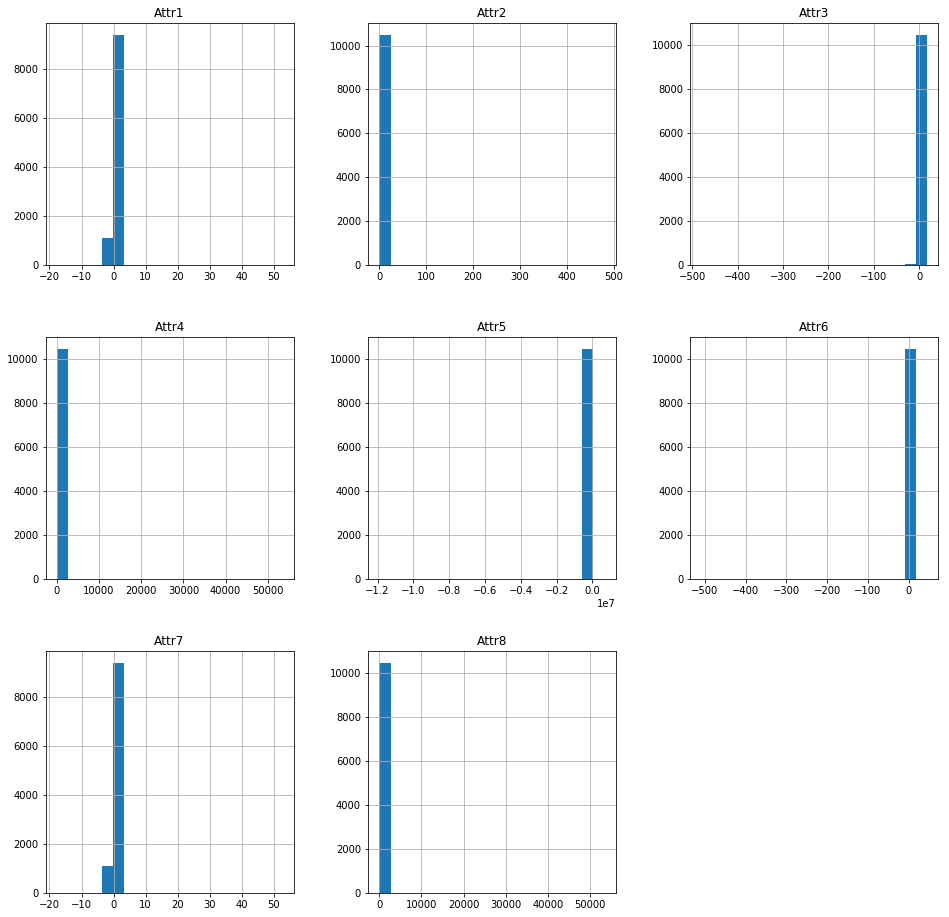

In [9]:
processed_data[parameter_groups[0]].hist(bins=20, figsize=(16, 16))

In [10]:
processed_data.describe().T

count         mean            std           min         25%  \
Attr1   10503.0     0.052844       0.647797 -1.769200e+01    0.000686   
Attr2   10503.0     0.619911       6.427041  0.000000e+00    0.253955   
Attr3   10503.0     0.095490       6.420056 -4.797300e+02    0.017461   
Attr4   10485.0     9.980499     523.691951  2.080200e-03    1.040100   
Attr5   10478.0 -1347.662372  118580.569222 -1.190300e+07  -52.070750   
Attr6   10503.0    -0.121159       6.970625 -5.081200e+02    0.000000   
Attr7   10503.0     0.065624       0.651152 -1.769200e+01    0.002118   
Attr8   10489.0    19.140113     717.756745 -2.081800e+00    0.431270   
Attr9   10500.0     1.819254       7.581659 -1.215700e+00    1.011275   
Attr10  10503.0     0.366093       6.428603 -4.797300e+02    0.297340   
Attr11  10503.0     0.086764       0.655407 -1.769200e+01    0.009809   
Attr12  10485.0     2.411266     111.459642 -1.543800e+03    0.006183   
Attr13  10460.0     0.376563      49.675550 -6.317100e+02    0.020740   
Attr14  10503.0     0.065634       0.651151 -1.769200e+01    0.002131   
Attr15  10495.0  3004.332479  109198.119626 -2.321800e+06  186.595000   
Attr16  10489.0     2.729654     110.233475 -2.043000e+02    0.060302   
Attr17  10489.0    20.511539     721.812766 -4.341100e-02    1.449200   
Attr18  10503.0     0.070739       0.835328 -1.769200e+01    0.002131   
Attr19  10460.0    -0.170778      11.210201 -7.716500e+02    0.001648   
Attr20  10460.0    68.448531    1083.699904 -1.438600e-03   14.253750   
Attr21   9696.0     4.670725     305.897238 -1.107500e+00    0.796673   
Attr22  10503.0     0.075676       0.581734 -1.769200e+01    0.000000   
Attr23  10460.0    -0.176466      11.149274 -7.716500e+02    0.000556   
Attr24  10276.0     0.211936       2.093845 -6.074200e+01    0.014938   
Attr25  10503.0     0.196153       6.742161 -5.007500e+02    0.135695   
Attr26  10489.0     2.580730     108.823993 -2.043000e+02    0.055067   
Attr27   9788.0  1185.945272   34691.229230 -1.901300e+05    0.000000   
Attr28  10275.0     6.092884      94.713753 -6.904000e+02    0.027178   
Attr29  10503.0     3.921179       0.840528 -3.585300e-01    3.393200   
Attr30  10460.0     0.459346      71.755042 -6.351700e+03    0.073850   
...         ...          ...            ...           ...         ...   
Attr35  10503.0     0.071075       0.572124 -1.707300e+01    0.001730   
Attr36  10503.0     1.981250       2.630705 -8.446500e-05    1.043500   
Attr38  10503.0     0.465510       6.425362 -4.797300e+02    0.426810   
Attr39  10460.0    -0.076355       8.079334 -5.511100e+02    0.001557   
Attr40  10485.0     2.381026      37.819839 -7.081900e+00    0.053666   
Attr41  10301.0    28.707178    2845.290346 -6.677300e+02    0.022026   
Attr42  10460.0    -0.141671      10.787555 -7.658000e+02    0.000000   
Attr43  10460.0   195.389286    3303.309554 -2.511300e+04   65.627250   
Attr44  10460.0   126.940260    2766.505503 -2.511300e+04   34.214750   
Attr45   9912.0    17.451297    1720.342176 -7.438500e+04    0.006157   
Attr46  10485.0     8.978029     523.565601 -6.469200e+00    0.602830   
Attr47  10417.0   542.488828   31264.160236 -1.730300e+01   14.941000   
Attr48  10503.0     0.004834       0.629770 -1.769200e+01   -0.048988   
Attr49  10460.0    -0.217844      11.910935 -9.057500e+02   -0.036186   
Attr50  10489.0     8.686024     522.528325  2.080200e-03    0.749370   
Attr51  10503.0     0.497135       6.420885  0.000000e+00    0.177200   
Attr52  10417.0    11.244158     851.867915 -2.546700e+01    0.122470   
Attr53  10275.0     5.725829      89.708042 -8.690400e+02    0.667285   
Attr54  10275.0     6.708568      93.511530 -7.064900e+02    0.950435   
Attr55  10503.0  6638.548617   59891.957972 -7.513800e+05   14.621000   
Attr56  10460.0    -0.530082      55.978608 -5.691700e+03    0.005137   
Attr57  10503.0    -0.014817      18.684047 -1.667300e+03    0.006796   
Attr58  10474.0     3.848794     190.201224 -1.986900e+02    0.87556

## Выбросы
### Прежде, чем проводить замену отсутствующих значений, избавимся от выбросов.
### <font color=red> Практически у всех параметров диапазон значений (от манимума до максимума) на ПОРЯДКИ превосходит значение дисперсии) </font>

In [11]:
def outlier_detect_mean_std(data,col,threshold=3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    para = (Upper_fence, Lower_fence)   
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    #print('Количество выбросов в данных:',outlier_index.value_counts()[1])
    #print('Доля выбросов:',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

In [12]:
def multi_mean_std_outlier(data, columns=[], threshold=3):
    if len(columns)==0:
        columns = data.columns.to_list()
    result = pd.DataFrame()
    outlier_indices = None
    outlier_fences = {k:[] for k in columns}
    for col in columns:        
        index, fences = outlier_detect_mean_std(data, col, threshold)
        if len(index.value_counts()) > 1:            
            outliers_absolute_count = index.value_counts()[1]
        else:
            outliers_absolute_count = 0
        outliers_relative_count = outliers_absolute_count / len(index)
        if outlier_indices is None:
            outlier_indices = data[index].index
        else:
            outlier_indices = outlier_indices.union(data[index].index)
        outlier_fences[col].append(fences[0])
        outlier_fences[col].append(fences[1])
        outlier_fences[col].append(outliers_absolute_count)
        outlier_fences[col].append(outliers_relative_count)
    fences_df = pd.DataFrame(data=outlier_fences, index=['upper_fence', 'lower_fence', 'outliers_total', 'outliers_relative'])
    return outlier_indices, fences_df

In [13]:
outlier_indices, outlier_info = multi_mean_std_outlier(processed_data, data_header, threshold=3)

In [14]:
outlier_info.T

upper_fence    lower_fence  outliers_total  outliers_relative
Attr1        1.996235      -1.890546            30.0           0.002856
Attr2       19.901035     -18.661212             3.0           0.000286
Attr3       19.355659     -19.164678             3.0           0.000286
Attr4     1581.056353   -1561.095354             3.0           0.000286
Attr5   354394.045293 -357089.370037             6.0           0.000571
Attr6       20.790716     -21.033034             9.0           0.000857
Attr7        2.019080      -1.887831            31.0           0.002952
Attr8     2172.410349   -2134.130123             7.0           0.000666
Attr9       24.564231     -20.925723             7.0           0.000666
Attr10      19.651902     -18.919717             3.0           0.000286
Attr11       2.052984      -1.879457            31.0           0.002952
Attr12     336.790193    -331.967660             9.0           0.000857
Attr13     149.403212    -148.650087             4.0           0.000381
Attr14       2.019088      -1.887819            31.0           0.002952
Attr15  330598.691356 -324590.026398            25.0           0.002380
Attr16     333.430080    -327.970772             7.0           0.000666
Attr17    2185.949837   -2144.926758             7.0           0.000666
Attr18       2.576725      -2.435246            20.0           0.001904
Attr19      33.459825     -33.801381            13.0           0.001238
Attr20    3319.548243   -3182.651180             4.0           0.000381
Attr21     922.362437    -913.020988             2.0           0.000190
Attr22       1.820878      -1.669526            34.0           0.003237
Attr23      33.271357     -33.624288            13.0           0.001238
Attr24       6.493473      -6.069600            13.0           0.001238
Attr25      20.422635     -20.030330             6.0           0.000571
Attr26     329.052710    -323.891249             7.0           0.000666
Attr27  105259.632961 -102887.742416            21.0           0.001999
Attr28     290.234144    -278.048376            30.0           0.002856
Attr29       6.442763       1.399595            37.0           0.003523
Attr30     215.724473    -214.805781            10.0           0.000952
...               ...            ...             ...                ...
Attr34     212.504144    -201.707431            16.0           0.001523
Attr35       1.787448      -1.645298            38.0           0.003618
Attr36       9.873365      -5.910866            58.0           0.005522
Attr38      19.741595     -18.810574             3.0           0.000286
Attr39      24.161648     -24.314358             7.0           0.000666
Attr40     115.840542    -111.078490            27.0           0.002571
Attr41    8564.578216   -8507.163860             1.0           0.000095
Attr42      32.220993     -32.504336            11.0           0.001047
Attr43   10105.317947   -9714.539376            13.0           0.001238
Attr44    8426.456770   -8172.576250            12.0           0.001143
Attr45    5178.477825   -5143.575232             8.0           0.000762
Attr46    1579.674832   -1561.718774             3.0           0.000286
Attr47   94334.969536  -93249.991880             5.0           0.000476
Attr48       1.894144      -1.884476            67.0           0.006379
Attr49      35.514960     -35.950649            12.0           0.001143
Attr50    1576.270999   -1558.898950             2.0           0.000190
Attr51      19.759789     -18.765519             3.0           0.000286
Attr52    2566.847902   -2544.359586             3.0           0.000286
Attr53     274.849954    -263.398296            36.0           0.003428
Attr54     287.243158    -273.826021            30.0           0.002856
Attr55  186314.422534 -173037.325299            93.0           0.008855
Attr56     167.405743    -168.465907             3.0           0.000286
Attr57      56.037324     -56.066958            16.0           0.001523
Attr58     574.452467    -566.754879             4

In [15]:
print("Общее количество выбросов: ", len(outlier_indices))
print("Общий процент выбросов: ", len(outlier_indices) * 100. / len(processed_data))

Общее количество выбросов:  495
Общий процент выбросов:  4.712939160239931


In [16]:
def outlier_detect_IQR(data,col,threshold=3):    
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    para = (Upper_fence, Lower_fence)
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    #print('Количество выбросов в данных:',outlier_index.value_counts()[1])
    #print('Доля выбросов:',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

In [17]:
def multi_IQR_outlier(data, columns=[], threshold=3):
    if len(columns)==0:
        columns = data.columns.to_list()
    result = pd.DataFrame()
    outlier_indices = None
    outlier_fences = {k:[] for k in columns}
    for col in columns:        
        index, fences = outlier_detect_IQR(data, col, threshold)
        if len(index.value_counts()) > 1:            
            outliers_absolute_count = index.value_counts()[1]
        else:
            outliers_absolute_count = 0
        outliers_relative_count = outliers_absolute_count / len(index)
        if outlier_indices is None:
            outlier_indices = data[index].index
        else:
            outlier_indices = outlier_indices.union(data[index].index)
        outlier_fences[col].append(fences[0])
        outlier_fences[col].append(fences[1])
        outlier_fences[col].append(outliers_absolute_count)
        outlier_fences[col].append(outliers_relative_count)
    fences_df = pd.DataFrame(data=outlier_fences, index=['upper_fence', 'lower_fence', 'outliers_total', 'outliers_relative'])
    return outlier_indices, fences_df

In [18]:
outlier_indices, outlier_info = multi_IQR_outlier(processed_data, data_header, threshold=4.7)

In [19]:
outlier_info.T

upper_fence   lower_fence  outliers_total  outliers_relative
Attr1       0.702464     -0.577973           209.0           0.019899
Attr2       2.735592     -1.792307            64.0           0.006093
Attr3       2.309342     -1.872337            55.0           0.005237
Attr4      11.980680     -7.981080           413.0           0.039322
Attr5     564.411325   -560.398075           762.0           0.072551
Attr6       0.413732     -0.341147          1333.0           0.126916
Attr7       0.801015     -0.656622           177.0           0.016852
Attr8      14.258501    -10.970131           432.0           0.041131
Attr9       6.983878     -3.913503           131.0           0.012473
Attr10      2.738622     -1.715647            70.0           0.006665
Attr11      0.872109     -0.701209           145.0           0.013806
Attr12      3.221877     -2.645354           542.0           0.051604
Attr13      0.664116     -0.509764           295.0           0.028087
Attr14      0.800950     -0.656544           177.0           0.016852
Attr15  11589.473500  -9215.778500           699.0           0.066552
Attr16      3.381852     -2.678520           517.0           0.049224
Attr17     15.557270    -10.183770           436.0           0.041512
Attr18      0.801007     -0.656591           178.0           0.016948
Attr19      0.491475     -0.402245           322.0           0.030658
Attr20    296.087400   -218.135400           104.0           0.009902
Attr21      2.557844     -0.655522            99.0           0.009426
Attr22      0.831573     -0.685683           145.0           0.013806
Attr23      0.430212     -0.353721           362.0           0.034466
Attr24      2.059725     -1.671114           105.0           0.009997
Attr25      2.862604     -2.112809           104.0           0.009902
Attr26      3.098941     -2.454794           521.0           0.049605
Attr27     27.441510    -22.627210          1315.0           0.125202
Attr28      8.791911     -7.199883           753.0           0.071694
Attr29      9.416675     -1.573525             1.0           0.000095
Attr30      2.082472     -1.582382           296.0           0.028182
...              ...           ...             ...                ...
Attr34     25.453958    -20.317898           235.0           0.022375
Attr35      0.822532     -0.675072           164.0           0.015615
Attr36      8.665825     -5.241575            82.0           0.007807
Attr38      2.487958     -1.272733            72.0           0.006855
Attr39      0.510918     -0.418443           269.0           0.025612
Attr40      3.978025     -3.182209           599.0           0.057031
Attr41      1.009118     -0.791892           787.0           0.074931
Attr42      0.520631     -0.429292           247.0           0.023517
Attr43    498.002175   -290.892425           159.0           0.015139
Attr44    299.930225   -184.883975           189.0           0.017995
Attr45      5.384934     -4.428975           821.0           0.078168
Attr46      8.809519     -6.164089           457.0           0.043511
Attr47    327.768400   -243.004400           146.0           0.013901
Attr48      0.804288     -0.752566           265.0           0.025231
Attr49      0.510401     -0.486881           379.0           0.036085
Attr50      9.623871     -6.568201           421.0           0.040084
Attr51      2.160743     -1.458353            69.0           0.006570
Attr52      1.437517     -0.961867           278.0           0.026469
Attr53      9.796491     -6.860306           707.0           0.067314
Attr54      9.424710     -6.037125           746.0           0.071027
Attr55  24720.011300 -20356.490300           834.0           0.079406
Attr56      0.716913     -0.581767           328.0           0.031229
Attr57      1.514524     -1.236417           485.0           0.046177
Attr58      1.561655      0.309833           348.0           0.033133
Attr59      1.369824     -1.129504           851.0           0.081024
Attr60     93.32939

In [20]:
print("Общее количество выбросов: ", len(outlier_indices))
print("Общий процент выбросов: ", len(outlier_indices) * 100. / len(processed_data))

Общее количество выбросов:  6312
Общий процент выбросов:  60.09711510996858


### Заменим выбросы медианными значениями.
### Выбросами будем считать значения, выпадающие из даипазона $\pm$ 5 межквартильных расстояний от 3-го и 1-го квартилей

In [21]:
def impute_outlier_with_avg(data,col,outlier_index,strategy='mean'):
    data_copy = data.copy(deep=True)
    if strategy=='mean':
        data_copy.loc[outlier_index,col] = data_copy[col].mean()
    elif strategy=='median':
        data_copy.loc[outlier_index,col] = data_copy[col].median()
    elif strategy=='mode':
        data_copy.loc[outlier_index,col] = data_copy[col].mode()[0]           
    return data_copy

In [22]:
for parameter in data_header:
    index, fences = outlier_detect_IQR(processed_data, parameter, 5)
    processed_data = impute_outlier_with_avg(data=processed_data, col=parameter,
                                             outlier_index=index,
                                             strategy='median')

In [23]:
processed_data.describe().T

count         mean          std           min         25%  \
Attr1   10503.0     0.056395     0.151707     -0.613420    0.001920   
Attr2   10503.0     0.502329     0.343183      0.000000    0.253955   
Attr3   10503.0     0.202985     0.337407     -1.987100    0.020502   
Attr4   10485.0     2.259593     2.054341      0.002080    1.040100   
Attr5   10478.0     2.606694   123.172248   -587.840000  -41.295000   
Attr6   10503.0     0.024941     0.120197     -0.359630    0.000000   
Attr7   10503.0     0.067130     0.169175     -0.695810    0.003575   
Attr8   10489.0     1.979129     2.597426     -2.081800    0.431270   
Attr9   10500.0     1.621000     1.074691     -1.215700    1.011275   
Attr10  10503.0     0.481857     0.341354     -1.839600    0.301570   
Attr11  10503.0     0.085110     0.173030     -0.738160    0.011201   
Attr12  10485.0     0.296609     0.697011     -2.799500    0.009343   
Attr13  10460.0     0.076553     0.126243     -0.537430    0.022698   
Attr14  10503.0     0.067141     0.169173     -0.695810    0.003582   
Attr15  10495.0  1120.875135  2532.156411  -9808.200000  236.760000   
Attr16  10489.0     0.399886     0.671937     -2.801400    0.063294   
Attr17  10489.0     3.043947     2.670132     -0.043411    1.449200   
Attr18  10503.0     0.067138     0.169173     -0.695810    0.003582   
Attr19  10460.0     0.038987     0.107856     -0.426880    0.003302   
Attr20  10460.0    46.281601    45.851396     -0.001439   14.253750   
Attr21   9696.0     0.966900     0.301513     -0.186360    0.796703   
Attr22  10503.0     0.075237     0.163207     -0.726060    0.000000   
Attr23  10460.0     0.032901     0.096972     -0.374490    0.002188   
Attr24  10276.0     0.200768     0.382396     -1.775300    0.017114   
Attr25  10503.0     0.342153     0.402122     -2.252400    0.145760   
Attr26  10489.0     0.357219     0.612008     -2.598100    0.057627   
Attr27   9788.0     2.063819     5.642052    -23.799000    0.077328   
Attr28  10275.0     0.869490     1.691162     -7.624700    0.038828   
Attr29  10503.0     3.921179     0.840528     -0.358530    3.393200   
Attr30  10460.0     0.273080     0.366086     -1.601300    0.075646   
...         ...          ...          ...           ...         ...   
Attr35  10503.0     0.071578     0.166448     -0.716330    0.002909   
Attr36  10503.0     1.867978     1.267957     -0.000084    1.043500   
Attr38  10503.0     0.579833     0.291198     -1.330100    0.433765   
Attr39  10460.0     0.043100     0.107105     -0.444720    0.003269   
Attr40  10485.0     0.471032     0.717053     -0.411990    0.053764   
Attr41  10301.0     0.106174     0.211844     -0.837390    0.026518   
Attr42  10460.0     0.043949     0.103439     -0.454230    0.000000   
Attr43  10460.0   111.117624    70.239062    -52.472000   65.631750   
Attr44  10460.0    62.168185    43.214742    -55.384000   34.218000   
Attr45   9912.0     0.424881     1.153249     -4.691400    0.018926   
Attr46  10485.0     1.515485     1.528697     -6.469200    0.602830   
Attr47  10417.0    50.228087    50.827329    -17.303000   14.941000   
Attr48  10503.0     0.025072     0.177402     -0.795030   -0.041998   
Attr49  10460.0     0.007049     0.115370     -0.514880   -0.027929   
Attr50  10489.0     1.748504     1.672335      0.002080    0.749370   
Attr51  10503.0     0.382678     0.284040      0.000000    0.177200   
Attr52  10417.0     0.267014     0.223165     -0.520330    0.122530   
Attr53  10275.0     1.561461     1.748508     -7.317600    0.689900   
Attr54  10275.0     1.758034     1.643810     -6.452000    0.962185   
Attr55  10503.0  2128.407346  5325.217217 -21602.000000   48.561500   
Attr56  10460.0     0.068432     0.148699     -0.613130    0.007460   
Attr57  10503.0     0.136033     0.314230     -1.304400    0.013235   
Attr58  10474.0     0.935118     0.142040      0.274490    0.884290   
Attr59  10503.0     0.132541     0.279280     -1.190400    0.000000   
Attr60   9911.0    14.785802    15

C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


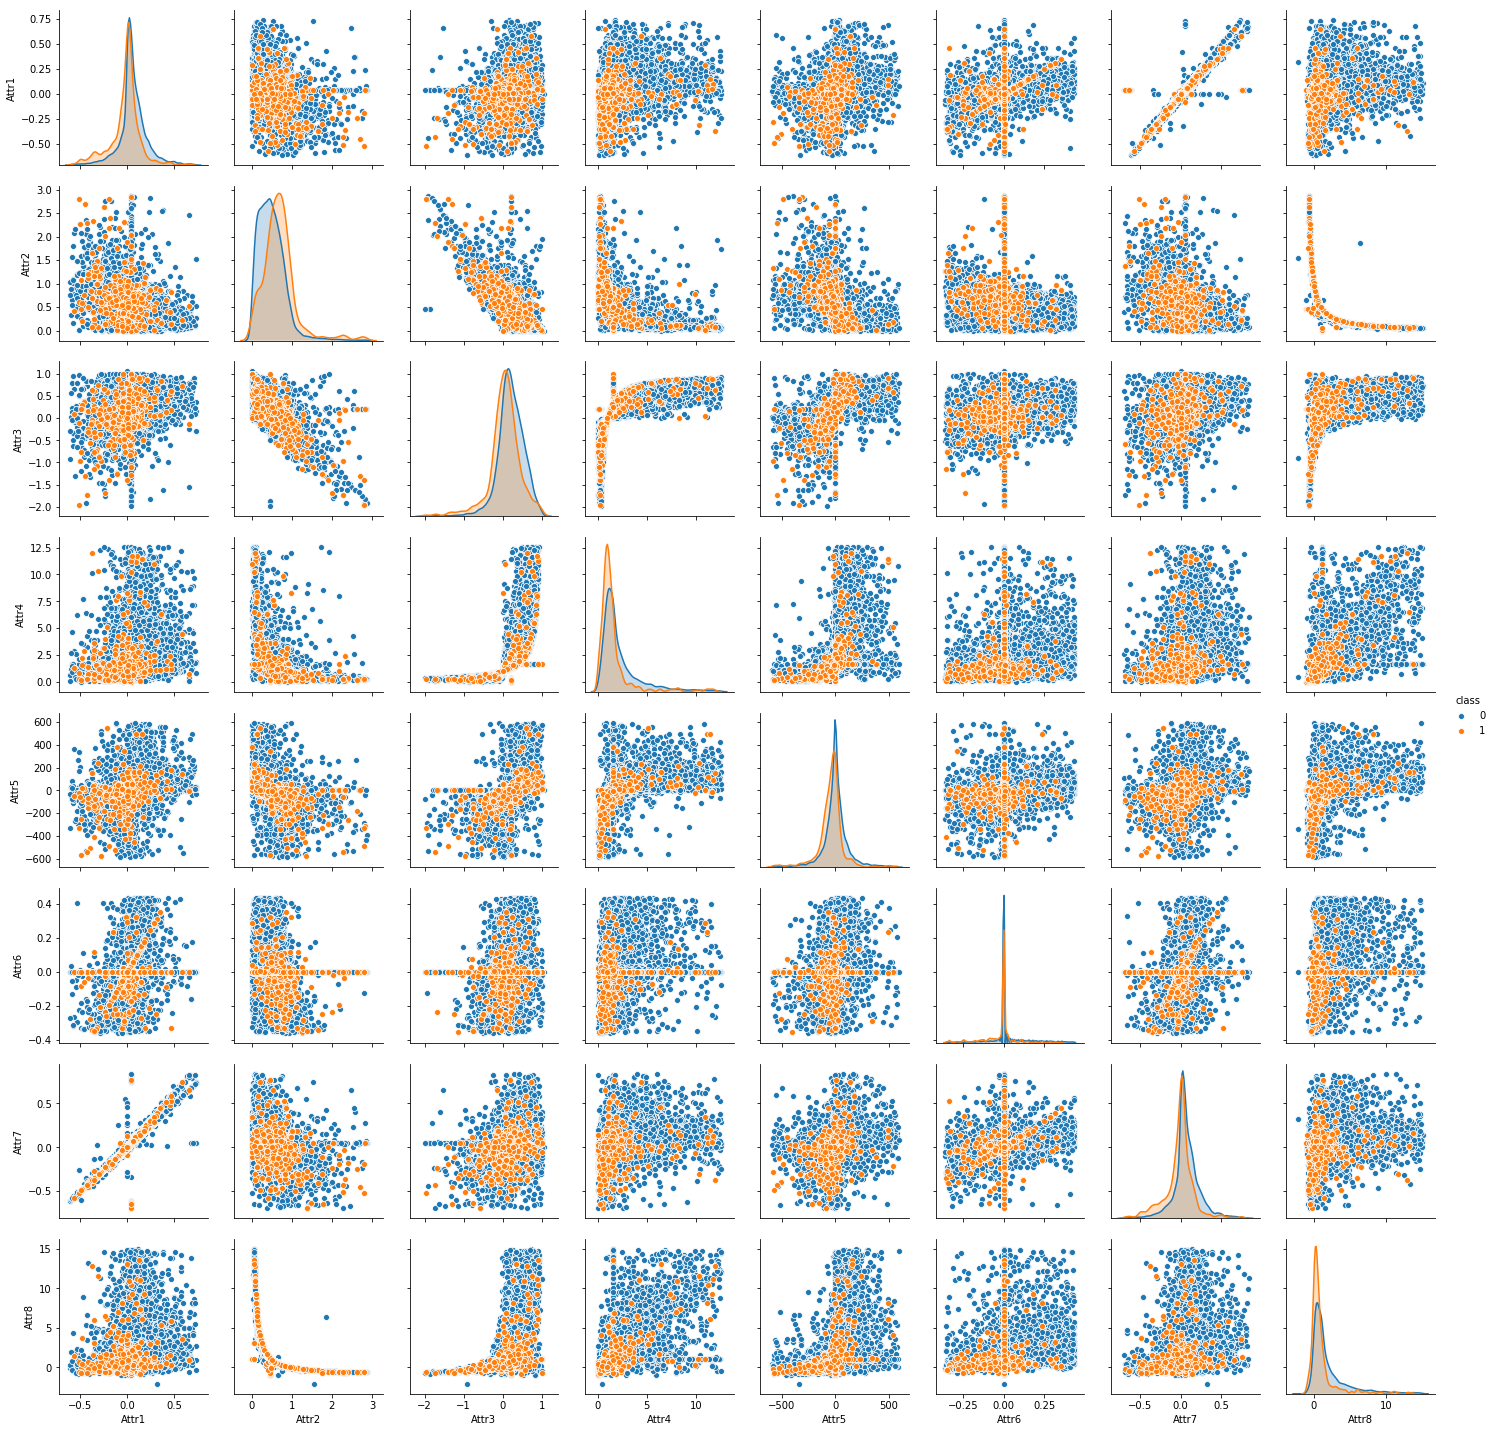

In [24]:
sns.pairplot(data=processed_data, vars=parameter_groups[0], hue='class')

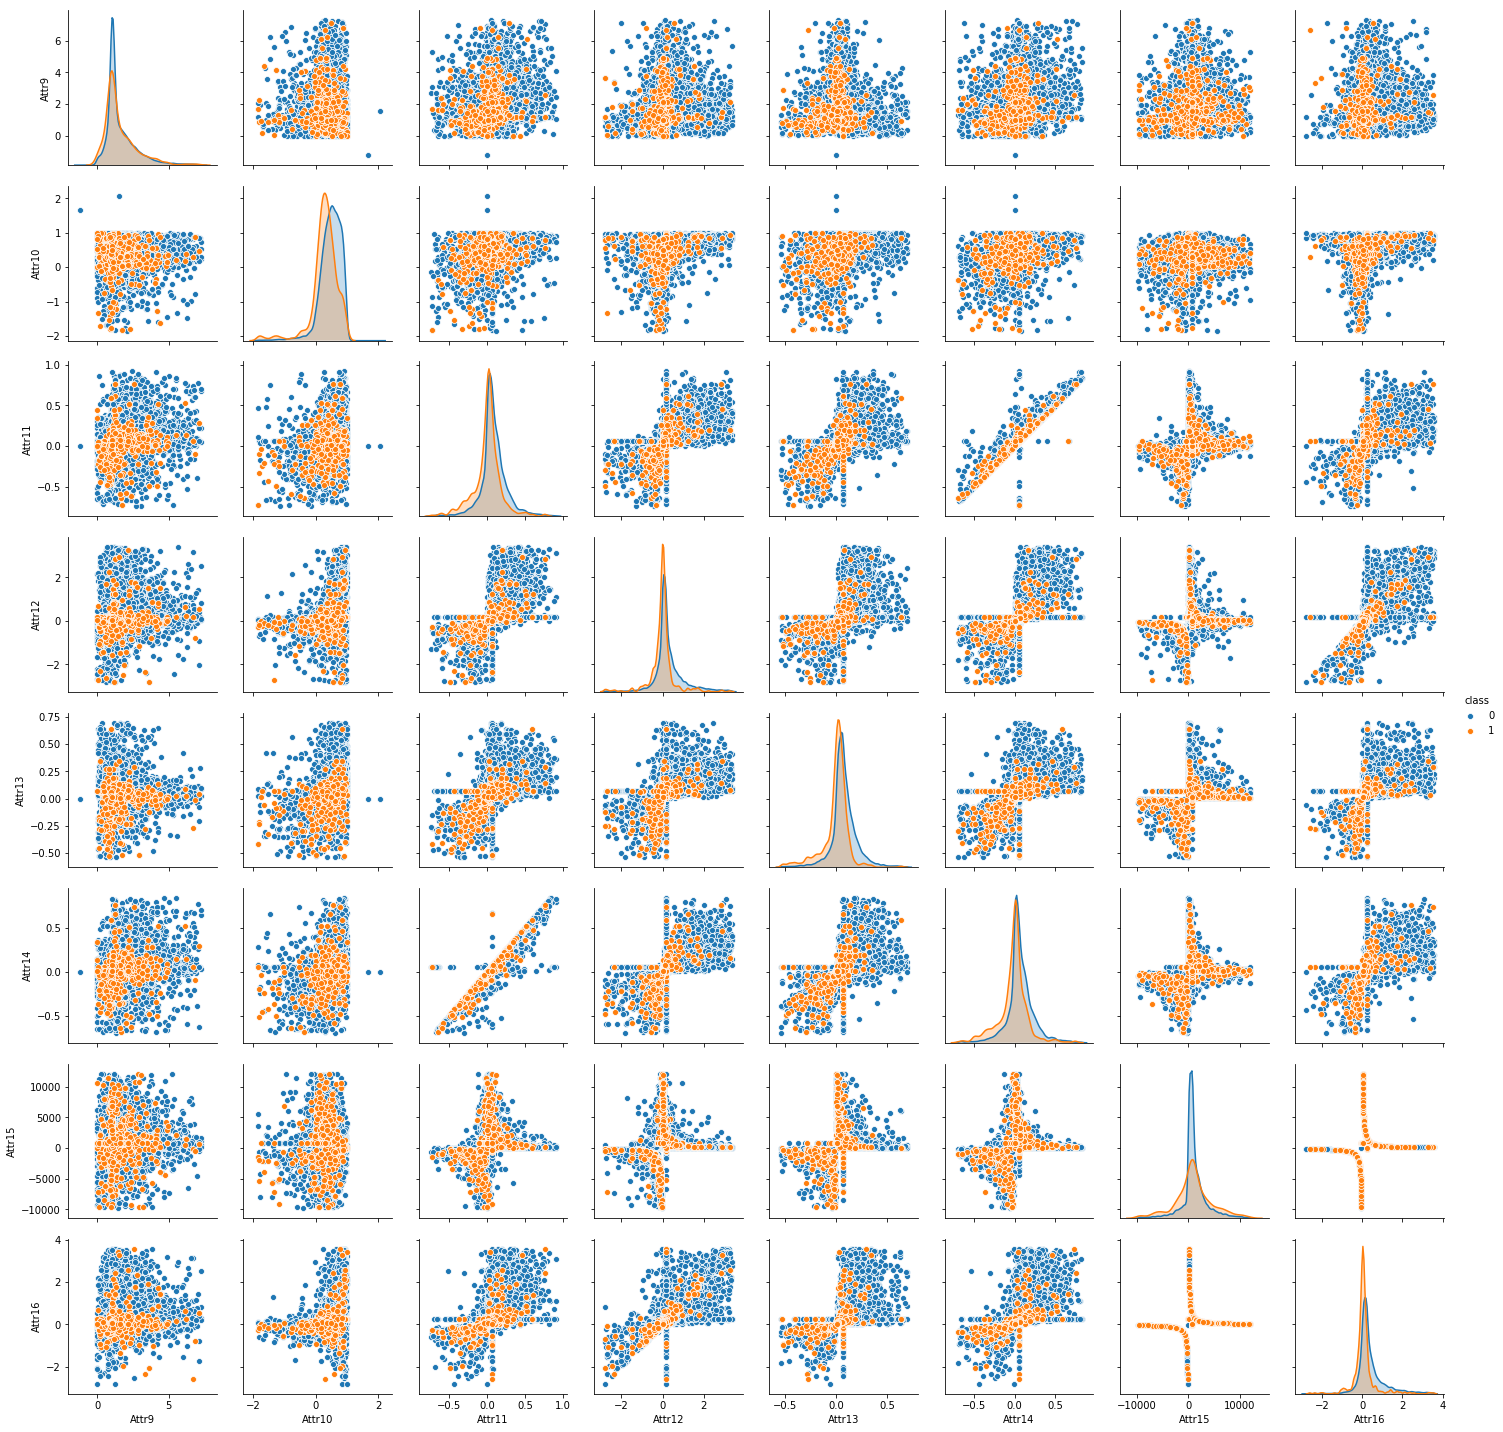

In [25]:
sns.pairplot(data=processed_data, vars=parameter_groups[1], hue='class')

### <font color=red> По графикам наблюдается значительная корреляция некоторых параметров. Оценим её численно. </font>
### Также для удобства просмотра разделим параметры на группы по степени взаимной корреляции

In [26]:
corr_matrix = processed_data.corr().drop('class', axis=1).drop('class', axis=0)

In [27]:
corr_matrix.mean().sort_values(ascending=False)

Attr7     0.315486
Attr18    0.315477
Attr14    0.315474
Attr11    0.307523
Attr1     0.307082
Attr19    0.297402
Attr22    0.295716
Attr23    0.291184
Attr31    0.284925
Attr42    0.282591
Attr35    0.282272
Attr48    0.280490
Attr12    0.267262
Attr39    0.264708
Attr49    0.264241
Attr24    0.263091
Attr13    0.256551
Attr16    0.251381
Attr26    0.250216
Attr45    0.226027
Attr3     0.212006
Attr56    0.201805
Attr50    0.192410
Attr10    0.189089
Attr25    0.187738
Attr46    0.185647
Attr4     0.183947
Attr53    0.179545
Attr57    0.174805
Attr54    0.171646
            ...   
Attr17    0.167465
Attr38    0.164310
Attr27    0.162730
Attr5     0.157390
Attr40    0.147041
Attr33    0.136369
Attr34    0.122048
Attr55    0.119279
Attr6     0.094069
Attr21    0.090419
Attr64    0.070793
Attr9     0.046878
Attr15    0.043628
Attr36    0.040486
Attr29    0.030175
Attr60    0.029833
Attr41    0.028607
Attr44    0.022527
Attr47    0.015046
Attr61    0.003844
Attr43   -0.002383
Attr59   -0.

### Наиболее коррелированные пары переменных - кандидаты на исключение из рассмотрения

In [28]:
most_correlated_variables = []
reject_list = []
for label_1 in corr_matrix.index:
    for label_2 in corr_matrix.columns[np.abs((corr_matrix[label_1] > 0.8)) & np.abs((corr_matrix[label_1]) < 1.0)]:        
        if label_1 not in most_correlated_variables:
            most_correlated_variables.append(label_1)            
        if label_2 not in most_correlated_variables:
            most_correlated_variables.append(label_2)
            print (label_1, '--', label_2, ':', corr_matrix[label_1][label_2])
            if label_2 not in reject_list:
                reject_list.append(label_2)
most_correlated_variables.sort()
reject_list.sort()

Attr1 -- Attr7 : 0.9441064435666622
Attr1 -- Attr11 : 0.9046110940750892
Attr1 -- Attr14 : 0.9440877558650472
Attr1 -- Attr18 : 0.9440946939353089
Attr1 -- Attr22 : 0.8322929500933729
Attr7 -- Attr35 : 0.8183767074588159
Attr7 -- Attr48 : 0.8237853096187057
Attr8 -- Attr17 : 0.972782504671433
Attr10 -- Attr38 : 0.804147226580736
Attr13 -- Attr19 : 0.8059176582713447
Attr16 -- Attr26 : 0.9435220575768495
Attr19 -- Attr23 : 0.9412381729293882
Attr19 -- Attr31 : 0.9100778011730654
Attr19 -- Attr42 : 0.8449137231745993
Attr20 -- Attr47 : 0.8817000634145172
Attr28 -- Attr53 : 0.9003137861596996
Attr28 -- Attr54 : 0.9415926748361477
Attr32 -- Attr52 : 0.989692071294711
Attr32 -- Attr62 : 0.837913049176484
Attr33 -- Attr63 : 0.8946517973184563
Attr42 -- Attr49 : 0.8715243724149555


In [29]:
print(*reject_list, sep=', ')

Attr11, Attr14, Attr17, Attr18, Attr19, Attr22, Attr23, Attr26, Attr31, Attr35, Attr38, Attr42, Attr47, Attr48, Attr49, Attr52, Attr53, Attr54, Attr62, Attr63, Attr7


In [30]:
corr_matrix = corr_matrix.drop(reject_list, axis=1)
mean_corr = corr_matrix.mean()

In [31]:
mean_corr.sort_values(ascending=False, inplace=True)

In [32]:
strongly_correlated_variables = corr_matrix.mean()[mean_corr>0.25].index.delete(0)
strongly_correlated_variables

Index(['Attr12', 'Attr13', 'Attr16', 'Attr24', 'Attr39'], dtype='object')

In [33]:
moderately_correlated_variables = corr_matrix.mean()[(mean_corr<=0.25) & (mean_corr>0.)].index.delete(0)
moderately_correlated_variables

Index(['Attr4', 'Attr5', 'Attr6', 'Attr8', 'Attr9', 'Attr10', 'Attr15',
       'Attr21', 'Attr25', 'Attr27', 'Attr28', 'Attr29', 'Attr33', 'Attr34',
       'Attr36', 'Attr40', 'Attr41', 'Attr44', 'Attr45', 'Attr46', 'Attr50',
       'Attr55', 'Attr56', 'Attr57', 'Attr60', 'Attr61', 'Attr64'],
      dtype='object')

In [34]:
fairly_correlated_variables = corr_matrix.mean()[mean_corr<=0.].index.delete(0)
fairly_correlated_variables

Index(['Attr20', 'Attr30', 'Attr32', 'Attr43', 'Attr51', 'Attr58', 'Attr59'], dtype='object')

In [35]:
sorted_by_correlation = strongly_correlated_variables.to_list()
sorted_by_correlation.extend(moderately_correlated_variables.to_list())
sorted_by_correlation.extend(fairly_correlated_variables.to_list())

### Для наглядности отсортируем параметры по убыванию взаимной корреляции и отбросим наиболее коррелированные

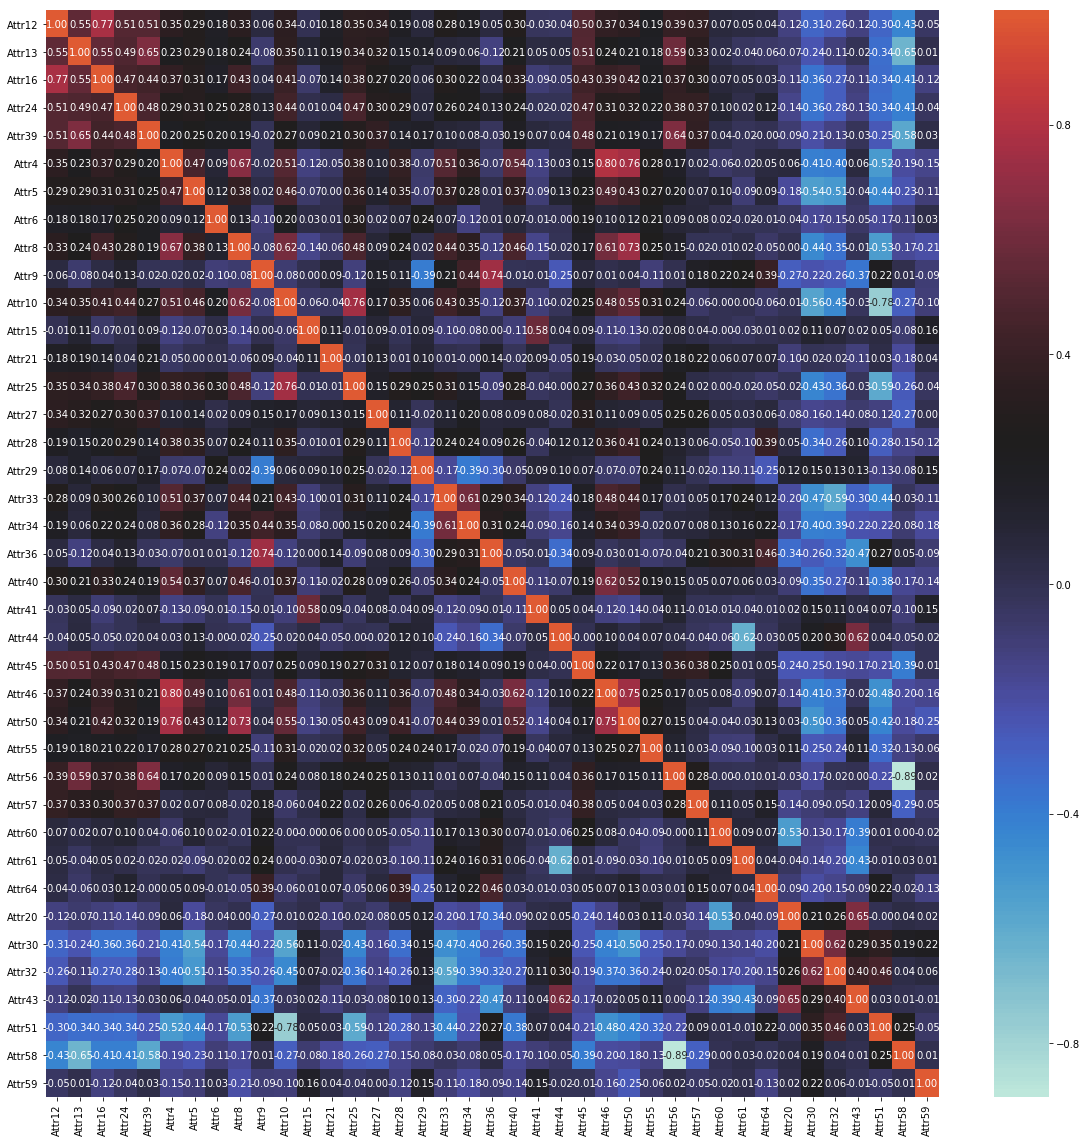

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix.loc[sorted_by_correlation, sorted_by_correlation], annot=True, fmt='.2f', center = 0.25)

Text(0.5, 0.98, 'ПАРАМЕТРЫ С НАИБОЛЬШЕЙ ВЗАИМНОЙ КОРРЕЛЯЦИЕЙ')

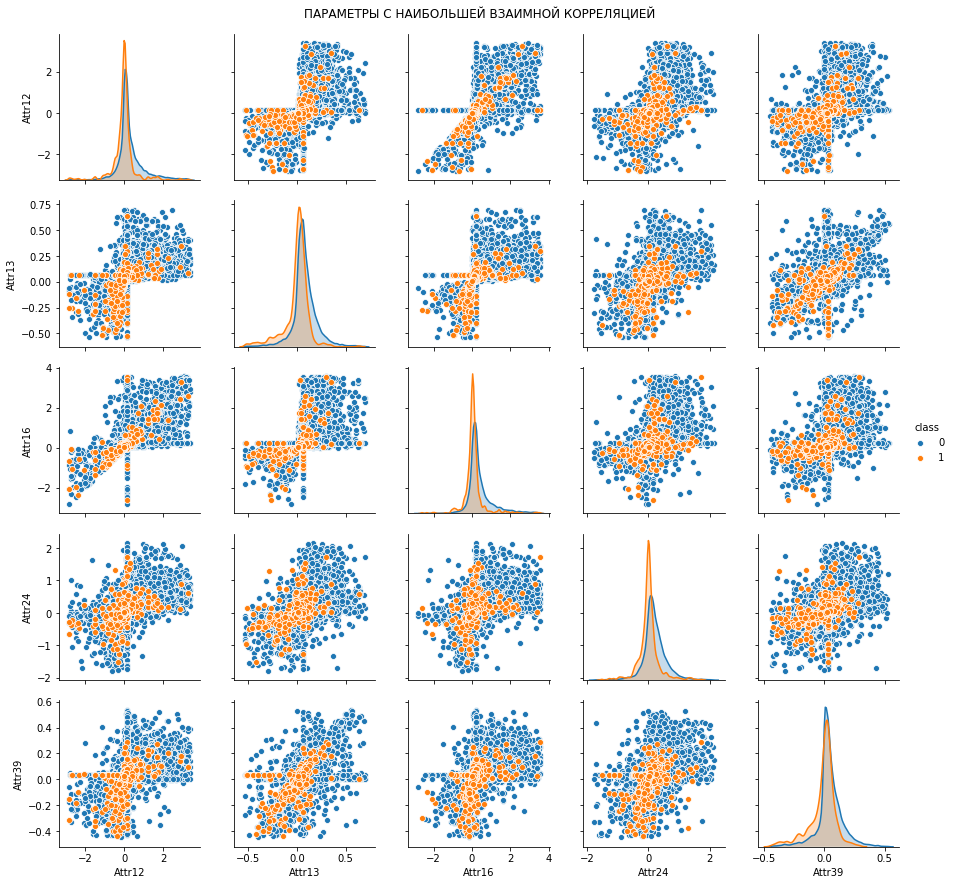

In [37]:
g = sns.pairplot(data=processed_data, vars=strongly_correlated_variables, hue='class')
plt.subplots_adjust(top=0.95)
g.fig.suptitle('ПАРАМЕТРЫ С НАИБОЛЬШЕЙ ВЗАИМНОЙ КОРРЕЛЯЦИЕЙ')

In [38]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()

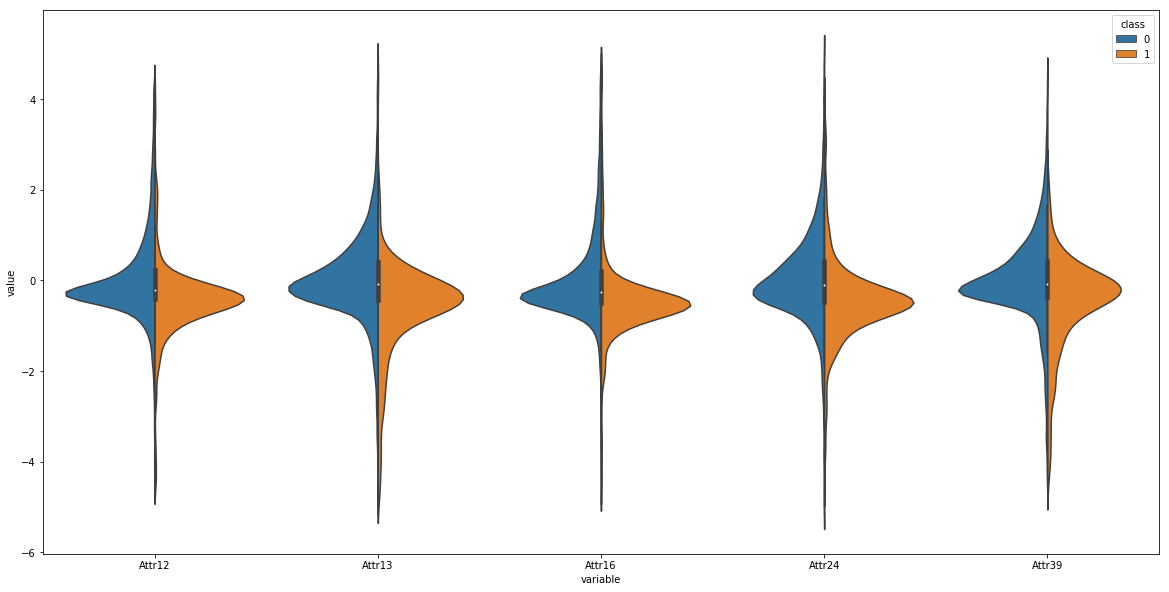

In [39]:
selected_data = processed_data.loc[:,strongly_correlated_variables]
scaled_selection = pd.DataFrame(standard_scaler.fit_transform(selected_data), columns=strongly_correlated_variables)
scaled_selection['class']= processed_data.loc[:,'class']
unpivoted_selection = scaled_selection.melt(id_vars='class', value_vars=strongly_correlated_variables)
plt.figure(figsize=(20,10))
sns.violinplot(x='variable', y='value', hue='class', data = unpivoted_selection, split=True)

In [40]:
from scipy import stats

In [41]:
negative_group = processed_data.loc[processed_data['class'] == 0].dropna()
positive_group = processed_data.loc[processed_data['class'] == 1].dropna()

In [42]:
selected_features = most_correlated_variables

bancrupcy_p_values = []

for feature in selected_features:
    t, p_value = stats.ttest_ind(positive_group[feature], negative_group[feature])
    bancrupcy_p_values.append(p_value)
    print(f'Различие средних значений признака {feature} при наступлении/ненаступлении бакротства')
    if p_value < 0.05:
        print(f'\tстатистически значимое, p_value={p_value}.')
    else:
        print(f'\t\tстатистически НЕзначимое, p_value={p_value}.')

Различие средних значений признака Attr1 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=8.124146328288908e-15.
Различие средних значений признака Attr10 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=2.2997484332821744e-15.
Различие средних значений признака Attr11 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=1.4867819215214802e-11.
Различие средних значений признака Attr13 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=1.205487885944408e-23.
Различие средних значений признака Attr14 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=4.9880644959611504e-14.
Различие средних значений признака Attr16 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=7.0880481480732775e-15.
Различие средних значений признака Attr17 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=3.3741209112636358e-06.
Различие средних значен

In [43]:
selected_features = strongly_correlated_variables.to_list()

bancrupcy_p_values = []

for feature in selected_features:
    t, p_value = stats.ttest_ind(positive_group[feature], negative_group[feature])
    bancrupcy_p_values.append(p_value)
    print(f'Различие средних значений признака {feature} при наступлении/ненаступлении бакротства')
    if p_value < 0.05:
        print(f'\tстатистически значимое, p_value={p_value}.')
    else:
        print(f'\t\tстатистически НЕзначимое, p_value={p_value}.')

Различие средних значений признака Attr12 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=4.2365684668813026e-12.
Различие средних значений признака Attr13 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=1.205487885944408e-23.
Различие средних значений признака Attr16 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=7.0880481480732775e-15.
Различие средних значений признака Attr24 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=3.630002887838018e-08.
Различие средних значений признака Attr39 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=5.632127083051175e-16.


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 0.98, 'ПАРАМЕТРЫ С НАИМЕНЬШЕЙ ВЗАИМНОЙ КОРРЕЛЯЦИЕЙ')

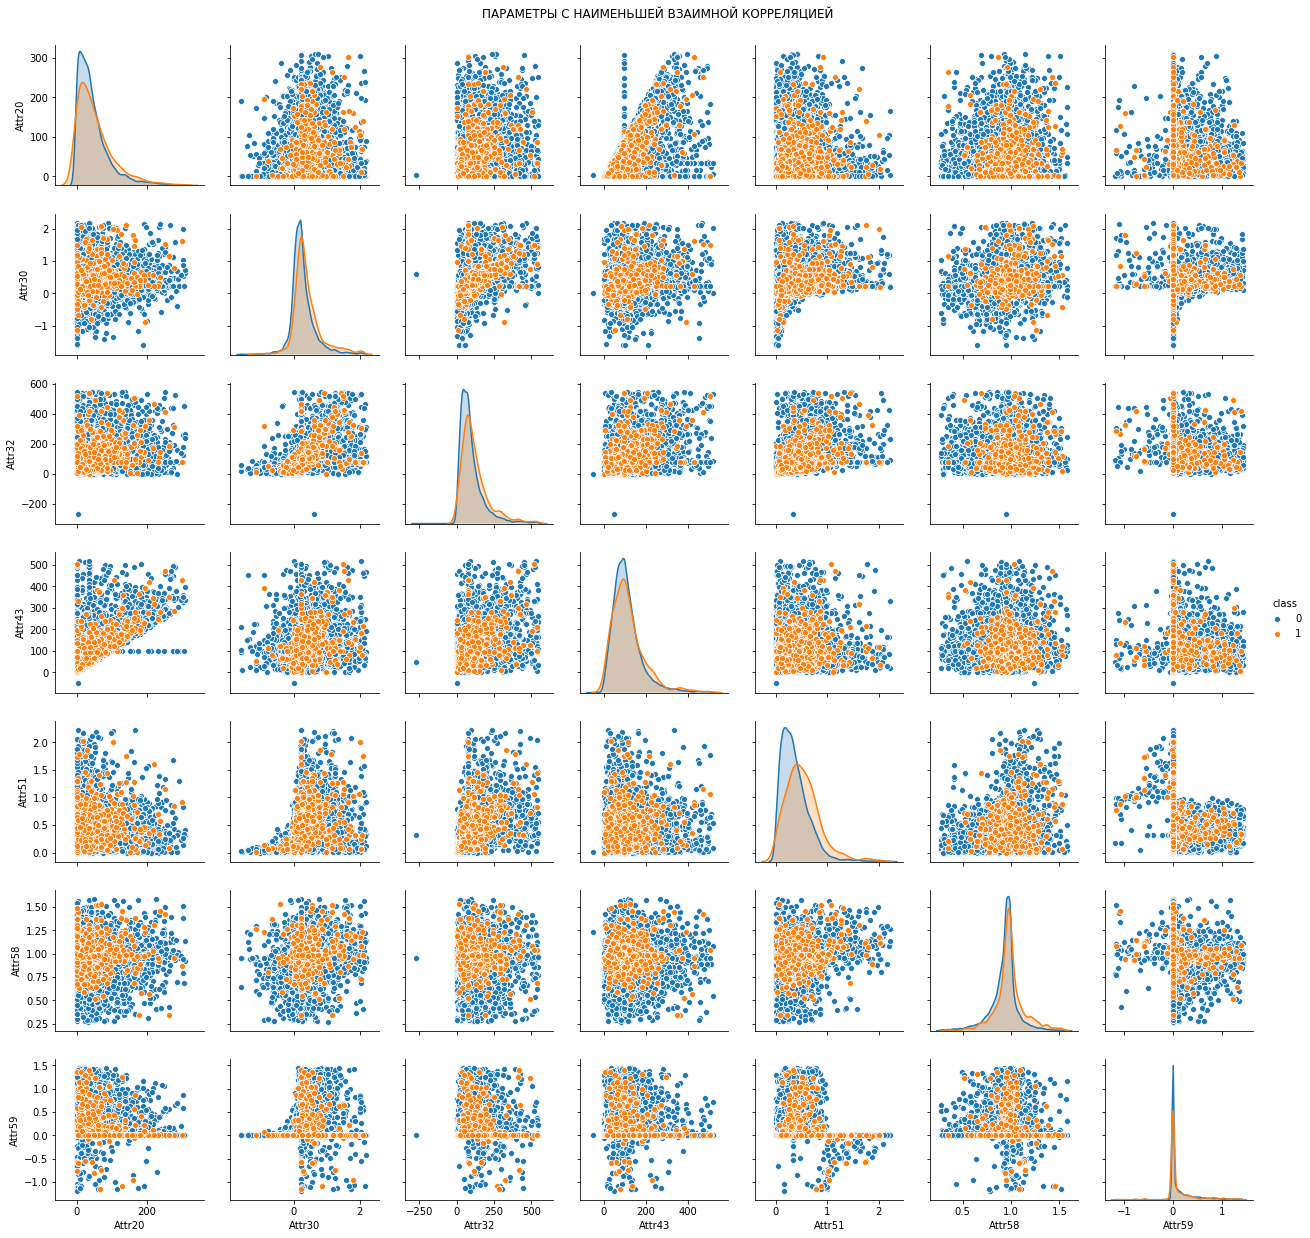

In [44]:
g = sns.pairplot(data=processed_data, vars=fairly_correlated_variables, hue='class')
plt.subplots_adjust(top=0.95, hspace = 0.2)
g.fig.suptitle('ПАРАМЕТРЫ С НАИМЕНЬШЕЙ ВЗАИМНОЙ КОРРЕЛЯЦИЕЙ')

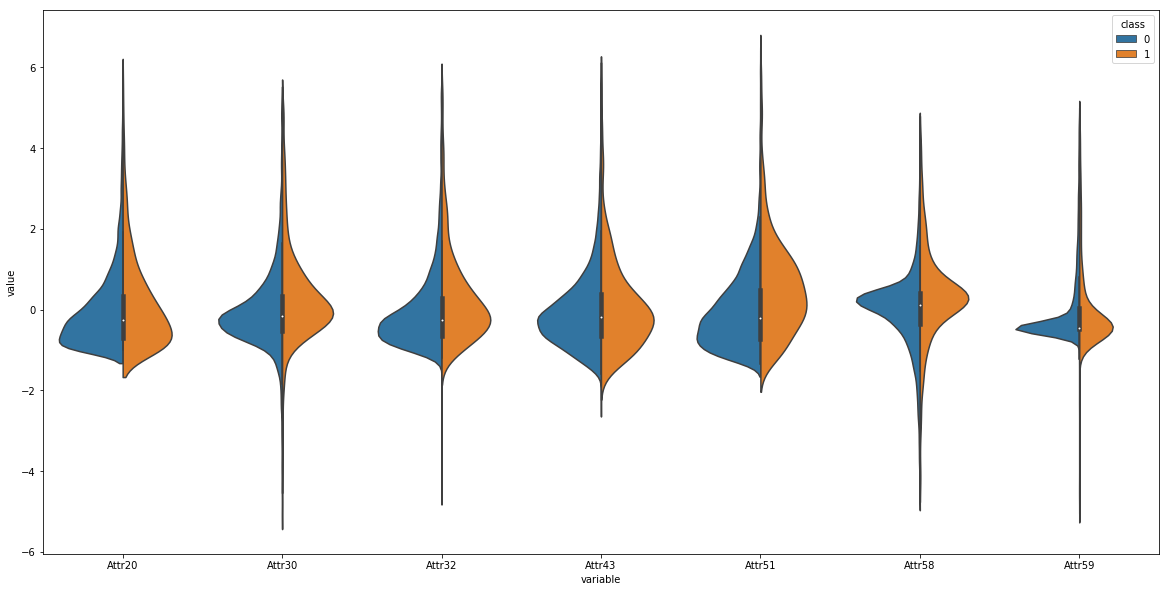

In [45]:
selected_data = processed_data.loc[:,fairly_correlated_variables]
scaled_selection = pd.DataFrame(standard_scaler.fit_transform(selected_data), columns=fairly_correlated_variables)
scaled_selection['class']= processed_data.loc[:,'class']
unpivoted_selection = scaled_selection.melt(id_vars='class', value_vars=fairly_correlated_variables)
plt.figure(figsize=(20,10))
sns.violinplot(x='variable', y='value', hue='class', data = unpivoted_selection, split=True)

In [46]:
selected_features = fairly_correlated_variables.to_list()

bancrupcy_p_values = []

for feature in selected_features:
    t, p_value = stats.ttest_ind(positive_group[feature], negative_group[feature])
    bancrupcy_p_values.append(p_value)
    print(f'Различие средних значений признака {feature} при наступлении/ненаступлении бакротства')
    if p_value < 0.05:
        print(f'\tстатистически значимое, p_value={p_value}.')
    else:
        print(f'\t\tстатистически НЕзначимое, p_value={p_value}.')

Различие средних значений признака Attr20 при наступлении/ненаступлении бакротства
		статистически НЕзначимое, p_value=0.11670686473037375.
Различие средних значений признака Attr30 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=2.633773788186867e-08.
Различие средних значений признака Attr32 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=3.7462124714730512e-06.
Различие средних значений признака Attr43 при наступлении/ненаступлении бакротства
		статистически НЕзначимое, p_value=0.16493148317247244.
Различие средних значений признака Attr51 при наступлении/ненаступлении бакротства
	статистически значимое, p_value=7.085353199619771e-12.
Различие средних значений признака Attr58 при наступлении/ненаступлении бакротства
		статистически НЕзначимое, p_value=0.2515927738321851.
Различие средних значений признака Attr59 при наступлении/ненаступлении бакротства
		статистически НЕзначимое, p_value=0.5829899418122667.


In [47]:
selected_features = moderately_correlated_variables.to_list()

bancrupcy_p_values = []

for feature in selected_features:
    t, p_value = stats.ttest_ind(positive_group[feature], negative_group[feature])
    bancrupcy_p_values.append(p_value)
    print(f'Различие средних значений признака {feature} при наступлении/ненаступлении банкротства')
    if p_value < 0.05:
        print(f'\tстатистически значимое, p_value={p_value}.')
    else:
        print(f'\t\tстатистически НЕзначимое, p_value={p_value}.')

Различие средних значений признака Attr4 при наступлении/ненаступлении банкротства
	статистически значимое, p_value=0.00014310290154470628.
Различие средних значений признака Attr5 при наступлении/ненаступлении банкротства
	статистически значимое, p_value=3.2418778880814825e-05.
Различие средних значений признака Attr6 при наступлении/ненаступлении банкротства
	статистически значимое, p_value=2.5241352788687405e-07.
Различие средних значений признака Attr8 при наступлении/ненаступлении банкротства
	статистически значимое, p_value=1.0255436535700016e-05.
Различие средних значений признака Attr9 при наступлении/ненаступлении банкротства
	статистически значимое, p_value=0.0001206700914849034.
Различие средних значений признака Attr10 при наступлении/ненаступлении банкротства
	статистически значимое, p_value=2.2997484332821744e-15.
Различие средних значений признака Attr15 при наступлении/ненаступлении банкротства
		статистически НЕзначимое, p_value=0.8773741324232346.
Различие средних зна

### Из 63 признаков только 10 показали статистические незначимые различия средних значений для случаев наступления и ненаступления банкротства. Все эти 10 признаков - из числа "умеренно" и "слабо" коррелированных параметров (имеющих средний коэффициент корреляции с остальными параметрами меньше 0.25).

### Оценка важности - прежде, чем отбросить наиболее коррелированные параметры.

In [48]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

In [49]:
tmp_data = processed_data.dropna()

In [50]:
min_max_scaler = preprocessing.MinMaxScaler()

In [51]:
param_list = processed_data.columns.to_list()
param_list.remove('class')
tmp_data[param_list] = min_max_scaler.fit_transform(tmp_data[param_list])
tmp_data.describe().T

C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


count      mean       std  min       25%       50%       75%  max
Attr1   8234.0  0.496059  0.107013  0.0  0.456797  0.487084  0.542720  1.0
Attr2   8234.0  0.173117  0.111370  0.0  0.092401  0.161639  0.234532  1.0
Attr3   8234.0  0.729017  0.105757  0.0  0.670583  0.728297  0.796864  1.0
Attr4   8234.0  0.175241  0.157390  0.0  0.081655  0.124193  0.204278  1.0
Attr5   8234.0  0.497092  0.099647  0.0  0.461036  0.498191  0.531702  1.0
Attr6   8234.0  0.493482  0.156800  0.0  0.452319  0.452319  0.503512  1.0
Attr7   8234.0  0.496259  0.104854  0.0  0.455293  0.486417  0.542182  1.0
Attr8   8234.0  0.238173  0.149635  0.0  0.148909  0.187121  0.262571  1.0
Attr9   8234.0  0.218429  0.138471  0.0  0.139668  0.160346  0.264063  1.0
Attr10  8234.0  0.819040  0.111438  0.0  0.757409  0.829433  0.898610  1.0
Attr11  8234.0  0.498150  0.099183  0.0  0.455260  0.488934  0.540892  1.0
Attr12  8234.0  0.501765  0.110451  0.0  0.454198  0.477234  0.527992  1.0
Attr13  8234.0  0.498180  0.095061  0.0  0.455475  0.489736  0.539231  1.0
Attr14  8234.0  0.496267  0.104852  0.0  0.455328  0.486425  0.542182  1.0
Attr15  8234.0  0.497723  0.113816  0.0  0.456253  0.479658  0.532940  1.0
Attr16  8234.0  0.474407  0.108239  0.0  0.418308  0.445245  0.497025  1.0
Attr17  8234.0  0.189691  0.161247  0.0  0.093392  0.134509  0.215482  1.0
Attr18  8234.0  0.496265  0.104852  0.0  0.455328  0.486417  0.542182  1.0
Attr19  8234.0  0.506208  0.111754  0.0  0.467562  0.498530  0.555260  1.0
Attr20  8234.0  0.156230  0.144687  0.0  0.056790  0.115806  0.207384  1.0
Attr21  8234.0  0.365479  0.108714  0.0  0.302321  0.359300  0.414520  1.0
Attr22  8234.0  0.505547  0.098617  0.0  0.457421  0.494805  0.547844  1.0
Attr23  8234.0  0.495346  0.112517  0.0  0.458275  0.488179  0.543080  1.0
Attr24  8234.0  0.507911  0.095639  0.0  0.460243  0.497637  0.551322  1.0
Attr25  8234.0  0.638053  0.091770  0.0  0.589311  0.646339  0.701714  1.0
Attr26  8234.0  0.491957  0.103968  0.0  0.439291  0.464878  0.514760  1.0
Attr27  8234.0  0.492831  0.105109  0.0  0.455658  0.473313  0.497316  1.0
Attr28  8234.0  0.501344  0.095472  0.0  0.454304  0.478259  0.517086  1.0
Attr29  8234.0  0.538108  0.100670  0.0  0.470087  0.536753  0.600795  1.0
Attr30  8234.0  0.495455  0.091968  0.0  0.444501  0.479204  0.527692  1.0
...        ...       ...       ...  ...       ...       ...       ...  ...
Attr35  8234.0  0.510452  0.103341  0.0  0.466164  0.500678  0.555977  1.0
Attr36  8234.0  0.204760  0.132548  0.0  0.117620  0.174809  0.255490  1.0
Attr38  8234.0  0.713397  0.101778  0.0  0.661351  0.730580  0.786123  1.0
Attr39  8234.0  0.511802  0.106860  0.0  0.469621  0.503581  0.560402  1.0
Attr40  8234.0  0.188096  0.151241  0.0  0.101010  0.128507  0.202528  1.0
Attr41  8234.0  0.501356  0.109748  0.0  0.459299  0.484496  0.530465  1.0
Attr42  8234.0  0.501811  0.098820  0.0  0.458253  0.494520  0.547145  1.0
Attr43  8234.0  0.215627  0.131498  0.0  0.130356  0.191550  0.266974  1.0
Attr44  8234.0  0.196494  0.132646  0.0  0.110722  0.171835  0.248491  1.0
Attr45  8234.0  0.495880  0.110087  0.0  0.455686  0.478384  0.523521  1.0
Attr46  8234.0  0.505175  0.093014  0.0  0.449831  0.476938  0.521539  1.0
Attr47  8234.0  0.161623  0.142210  0.0  0.063360  0.121906  0.209567  1.0
Attr48  8234.0  0.504685  0.103622  0.0  0.462242  0.497022  0.549104  1.0
Attr49  8234.0  0.499934  0.105134  0.0  0.465066  0.500893  0.548652  1.0
Attr50  8234.0  0.169743  0.160116  0.0  0.073965  0.119773  0.199934  1.0
Attr51  8234.0  0.172036  0.121625  0.0  0.083837  0.148347  0.231405  1.0
Attr52  8234.0  0.389529  0.105822  0.0  0.320631  0.363285  0.421993  1.0
Attr53  8234.0  0.503122  0.093948  0.0  0.455811  0.484307  0.521499  1.0
Attr54  8234.0  0.501297  0.095149  0.0  0.454650  0.479349  0.517433  1.0
Attr55  8234.0  0.504880  0.117670  0.0  0.455920  0.472736  0.527771  1.0
Attr56  8234.0  0.494710  0.100028  0.0  0.453174  0.485083  0.532427  1.0
Attr57  8234.0  0.499264  0.103852

In [52]:
X = tmp_data.loc[:,tmp_data.columns!='class']
y = tmp_data['class']

In [53]:
feature_selector = SelectKBest(f_classif, k=10)
feature_selector.fit(X, y)

SelectKBest(k=10, score_func=<function f_classif at 0x0000007D20BE39D8>)

In [54]:
print(X.columns[feature_selector.get_support(indices=True)])

Index(['Attr2', 'Attr10', 'Attr13', 'Attr16', 'Attr19', 'Attr25', 'Attr26',
       'Attr35', 'Attr38', 'Attr39'],
      dtype='object')


In [55]:
important_features = X.columns[feature_selector.get_support(indices=True)].to_list()
for param in reject_list:
    if param in important_features:
        print(param, sep=', ')

Attr19
Attr26
Attr35
Attr38


In [56]:
feature_selector = SelectKBest(mutual_info_classif, k=10)
feature_selector.fit(X, y)

SelectKBest(k=10,
            score_func=<function mutual_info_classif at 0x0000007D20978048>)

In [57]:
print(X.columns[feature_selector.get_support(indices=True)])

Index(['Attr2', 'Attr9', 'Attr13', 'Attr15', 'Attr17', 'Attr25', 'Attr26',
       'Attr34', 'Attr39', 'Attr41'],
      dtype='object')


In [58]:
important_features = X.columns[feature_selector.get_support(indices=True)].to_list()
for param in reject_list:
    if param in important_features:
        print(param, sep=', ')

Attr17
Attr26


In [59]:
feature_selector = SelectKBest(chi2, k=10)
feature_selector.fit(X, y)

SelectKBest(k=10, score_func=<function chi2 at 0x0000007D20BE3AE8>)

In [60]:
print(X.columns[feature_selector.get_support(indices=True)])

Index(['Attr2', 'Attr4', 'Attr8', 'Attr13', 'Attr17', 'Attr19', 'Attr50',
       'Attr51', 'Attr62', 'Attr63'],
      dtype='object')


In [61]:
important_features = X.columns[feature_selector.get_support(indices=True)].to_list()
for param in reject_list:
    if param in important_features:
        print(param, sep=', ')

Attr17
Attr19
Attr62
Attr63


### Только параметры 'Attr17' и 'Attr26' в трёх разных тестах вошли в 10 наиболее важных параметров. Оставим их в наборе данных.
### Остальные 19 параметров из списка наиболее коррелированных - кандидатов на исключение - отбрасываем.

In [62]:
reject_list.remove('Attr17')
reject_list.remove('Attr26')

In [63]:
processed_data = processed_data.drop(reject_list, axis=1)

### Заменим пропущенные значения медианами

In [64]:
processed_data.fillna(processed_data.median(), inplace=True)

In [65]:
processed_data.count().sort_values()

Attr1     10503
Attr33    10503
Attr34    10503
Attr36    10503
Attr39    10503
Attr40    10503
Attr41    10503
Attr43    10503
Attr44    10503
Attr45    10503
Attr46    10503
Attr50    10503
Attr51    10503
Attr55    10503
Attr56    10503
Attr57    10503
Attr58    10503
Attr59    10503
Attr60    10503
Attr61    10503
Attr32    10503
Attr64    10503
Attr30    10503
Attr28    10503
Attr2     10503
Attr3     10503
Attr4     10503
Attr5     10503
Attr6     10503
Attr8     10503
Attr9     10503
Attr10    10503
Attr12    10503
Attr13    10503
Attr15    10503
Attr16    10503
Attr17    10503
Attr20    10503
Attr21    10503
Attr24    10503
Attr25    10503
Attr26    10503
Attr27    10503
Attr29    10503
class     10503
dtype: int64

## 2. Масштабирование численных параметров

In [66]:
processed_data.describe().T

count         mean          std           min         25%  \
Attr1   10503.0     0.056395     0.151707     -0.613420    0.001920   
Attr2   10503.0     0.502329     0.343183      0.000000    0.253955   
Attr3   10503.0     0.202985     0.337407     -1.987100    0.020502   
Attr4   10503.0     2.258472     2.052758      0.002080    1.040900   
Attr5   10503.0     2.604249   123.025565   -587.840000  -41.029500   
Attr6   10503.0     0.024941     0.120197     -0.359630    0.000000   
Attr8   10503.0     1.977971     2.595887     -2.081800    0.431935   
Attr9   10503.0     1.620880     1.074561     -1.215700    1.011350   
Attr10  10503.0     0.481857     0.341354     -1.839600    0.301570   
Attr12  10503.0     0.296368     0.696438     -2.799500    0.009469   
Attr13  10503.0     0.076512     0.125986     -0.537430    0.022862   
Attr15  10503.0  1120.635062  2531.206717  -9808.200000  237.005000   
Attr16  10503.0     0.399666     0.671516     -2.801400    0.063528   
Attr17  10503.0     3.042758     2.668550     -0.043411    1.450350   
Attr20  10503.0    46.233083    45.763689     -0.001439   14.400500   
Attr21  10503.0     0.965988     0.289714     -0.186360    0.813780   
Attr24  10503.0     0.199852     0.378291     -1.775300    0.019702   
Attr25  10503.0     0.342153     0.402122     -2.252400    0.145760   
Attr26  10503.0     0.357027     0.611623     -2.598100    0.057898   
Attr27  10503.0     1.995953     5.452391    -23.799000    0.150160   
Attr28  10503.0     0.860599     1.673768     -7.624700    0.047635   
Attr29  10503.0     3.921179     0.840528     -0.358530    3.393200   
Attr30  10503.0     0.272849     0.365353     -1.601300    0.076340   
Attr32  10503.0    97.488349    81.315050   -270.710000   45.136000   
Attr33  10503.0     6.132369     5.293464     -1.921900    2.789700   
Attr34  10503.0     3.332826     4.295255    -15.972000    0.373445   
Attr36  10503.0     1.867978     1.267957     -0.000084    1.043500   
Attr39  10503.0     0.043063     0.106888     -0.444720    0.003380   
Attr40  10503.0     0.470560     0.716528     -0.411990    0.053887   
Attr41  10503.0     0.105654     0.209830     -0.837390    0.027641   
Attr43  10503.0   111.068550    70.099298    -52.472000   65.777000   
Attr44  10503.0    62.136472    43.129017    -55.384000   34.303500   
Attr45  10503.0     0.415674     1.120964     -4.691400    0.028951   
Attr46  10503.0     1.514705     1.527502     -6.469200    0.603495   
Attr50  10503.0     1.747815     1.671327      0.002080    0.749810   
Attr51  10503.0     0.382678     0.284040      0.000000    0.177200   
Attr55  10503.0  2128.407346  5325.217217 -21602.000000   48.561500   
Attr56  10503.0     0.068363     0.148398     -0.613130    0.007577   
Attr57  10503.0     0.136033     0.314230     -1.304400    0.013235   
Attr58  10503.0     0.935167     0.141847      0.274490    0.884605   
Attr59  10503.0     0.132541     0.279280     -1.190400    0.000000   
Attr60  10503.0    14.513351    15.429822      0.000000    5.734300   
Attr61  10503.0     8.246687     6.288418     -6.590300    4.490600   
Attr64  10503.0     6.438278     7.840272     -0.000102    2.055600   
class   10503.0     0.047129     0.211926      0.000000    0.000000   

               50%          75%          max  
Attr1     0.043034     0.121265      0.73724  
Attr2     0.464140     0.684300      2.86430  
Attr3     0.198560     0.419465      1.05460  
Attr4     1.605600     2.622100     12.55000  
Attr5     1.579300    45.193500    595.28000  
Attr6     0.000000     0.013338      0.43545  
Attr8     1.111000     2.393700     14.98100  
Attr9     1.199000     2.008000      7.26740  
Attr10    0.515500     0.725320      2.06610  
Attr12    0.155880     0.461495      3.39060  
Attr13    0.066433     0.127780      0.69796  
Attr15  805.690000  1888.750000  12143.00000  
Attr16    0.235140     0.537550      3.55640  
Attr17    2.152500     3.462550     16.28200  
Attr20   34.430750    62.232500    309

### Исходя из описательной статистики параметров, большинство из них распределены в области неотрицательных значений. Отмасштабируем их к диапазону [0; 1].
### Параметр Attr5 имеет много положительных и отрицательных значений, а среднее значение и второй квартиль близки к 0. Для кодирования этого параметра используем standard scaler

In [67]:
scaled_data = processed_data.copy(deep=True)

In [68]:
min_max_params = processed_data.columns.to_list()
min_max_params.remove('class')
min_max_params.remove('Attr5')
print(*min_max_params, sep=', ')
print(len(min_max_params), 'из', len(processed_data.columns) - 1)

Attr1, Attr2, Attr3, Attr4, Attr6, Attr8, Attr9, Attr10, Attr12, Attr13, Attr15, Attr16, Attr17, Attr20, Attr21, Attr24, Attr25, Attr26, Attr27, Attr28, Attr29, Attr30, Attr32, Attr33, Attr34, Attr36, Attr39, Attr40, Attr41, Attr43, Attr44, Attr45, Attr46, Attr50, Attr51, Attr55, Attr56, Attr57, Attr58, Attr59, Attr60, Attr61, Attr64
43 из 44


In [69]:
scaled_data[min_max_params] = min_max_scaler.fit_transform(scaled_data[min_max_params])

In [70]:
standard_scaler = preprocessing.StandardScaler()

In [71]:
scaled_data[['Attr5']] = standard_scaler.fit_transform(scaled_data[['Attr5']])

In [72]:
scaled_data.describe().T

count          mean       std       min       25%       50%  \
Attr1   10503.0  4.959167e-01  0.112321  0.000000  0.455585  0.486025   
Attr2   10503.0  1.753760e-01  0.119814  0.000000  0.088662  0.162043   
Attr3   10503.0  7.200199e-01  0.110927  0.000000  0.660026  0.718565   
Attr4   10503.0  1.798220e-01  0.163593  0.000000  0.082788  0.127792   
Attr5   10503.0  4.126894e-16  1.000048 -4.799591 -0.354689 -0.008332   
Attr6   10503.0  4.836880e-01  0.151176  0.000000  0.452319  0.452319   
Attr8   10503.0  2.379311e-01  0.152137  0.000000  0.147323  0.187121   
Attr9   10503.0  3.343801e-01  0.126671  0.000000  0.262528  0.284648   
Attr10  10503.0  5.943766e-01  0.087399  0.000000  0.548217  0.602991   
Attr12  10503.0  5.001322e-01  0.112508  0.000000  0.453784  0.477437   
Attr13  10503.0  4.969618e-01  0.101981  0.000000  0.453535  0.488803   
Attr15  10503.0  4.978696e-01  0.115311  0.000000  0.457615  0.483522   
Attr16  10503.0  5.034865e-01  0.105621  0.000000  0.450616  0.477609   
Attr17  10503.0  1.890408e-01  0.163460  0.000000  0.091499  0.134509   
Attr20  10503.0  1.493887e-01  0.147867  0.000000  0.046534  0.111254   
Attr21  10503.0  4.073832e-01  0.102421  0.000000  0.353574  0.403511   
Attr24  10503.0  5.031080e-01  0.096358  0.000000  0.457221  0.492542   
Attr25  10503.0  6.007997e-01  0.093116  0.000000  0.555322  0.609029   
Attr26  10503.0  5.047530e-01  0.104469  0.000000  0.453660  0.480197   
Attr27  10503.0  4.902958e-01  0.103636  0.000000  0.455212  0.472637   
Attr28  10503.0  5.030203e-01  0.099223  0.000000  0.454827  0.479268   
Attr29  10503.0  4.288960e-01  0.084234  0.000000  0.375984  0.429990   
Attr30  10503.0  4.954003e-01  0.096575  0.000000  0.443456  0.480512   
Attr32  10503.0  4.509969e-01  0.099601  0.000000  0.386872  0.426541   
Attr33  10503.0  2.220771e-01  0.145955  0.000000  0.129911  0.182056   
Attr34  10503.0  4.531330e-01  0.100820  0.000000  0.383669  0.423059   
Attr36  10503.0  2.061951e-01  0.139956  0.000000  0.115190  0.175170   
Attr39  10503.0  4.970633e-01  0.108921  0.000000  0.456626  0.487909   
Attr40  10503.0  1.924995e-01  0.156287  0.000000  0.101616  0.132591   
Attr41  10503.0  4.985194e-01  0.110922  0.000000  0.457279  0.484496   
Attr43  10503.0  2.860691e-01  0.122619  0.000000  0.206844  0.265188   
Attr44  10503.0  3.189729e-01  0.117060  0.000000  0.243429  0.298034   
Attr45  10503.0  4.932989e-01  0.108275  0.000000  0.455945  0.478384   
Attr46  10503.0  5.082894e-01  0.097247  0.000000  0.450278  0.479379   
Attr50  10503.0  1.731378e-01  0.165758  0.000000  0.074158  0.121901   
Attr51  10503.0  1.718512e-01  0.127555  0.000000  0.079576  0.146654   
Attr55  10503.0  4.989363e-01  0.111964  0.000000  0.455207  0.472736   
Attr56  10503.0  4.984847e-01  0.108547  0.000000  0.454022  0.486344   
Attr57  10503.0  4.992662e-01  0.108915  0.000000  0.456703  0.489162   
Attr58  10503.0  5.049081e-01  0.108403  0.000000  0.466267  0.518582   
Attr59  10503.0  5.025800e-01  0.106097  0.000000  0.452228  0.453359   
Attr60  10503.0  1.483164e-01  0.157682  0.000000  0.058601  0.101704   
Attr61  10503.0  3.115489e-01  0.132045  0.000000  0.232678  0.278584   
Attr64  10503.0  1.342333e-01  0.163461  0.000000  0.042859  0.084634   
class   10503.0  4.712939e-02  0.211926  0.000000  0.000000  0.000000   

             75%      max  
Attr1   0.543945  1.00000  
Attr2   0.238907  1.00000  
Attr3   0.791191  1.00000  
Attr4   0.208801  1.00000  
Attr5   0.346199  4.81773  
Attr6   0.469095  1.00000  
Attr8   0.262296  1.00000  
Attr9   0.380014  1.00000  
Attr10  0.656712  1.00000  
Attr12  0.526808  1.00000  
Attr13  0.538462  1.00000  
Attr15  0.532862  1.00000  
Attr16  0.525174  1.00000  
Attr17  0.214755  1.00000  
Attr20  0.201085  1.00000  
Attr21  0.448202  1.00000  
Attr24  0.544325  1.00000  
Attr25  0.663732  1.00000  
Attr26  0.527012  1.00000  
Attr27  0.491786  1.00000  
Attr28  0.517933  1.00000  
Attr29  0.481887  1.00000  
Attr30 

### Целевая переменная 'class' уже была перекодирована в значения 1 и 0.

## 3. Построение и настройка модели случайного леса

In [73]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [74]:
X = scaled_data.loc[:,scaled_data.columns!='class']
y = scaled_data['class']

In [124]:
scaled_data.to_csv(path_or_buf='data/3year_scaled.csv', index=False)

In [75]:
y.value_counts()

0    10008
1      495
Name: class, dtype: int64

### <font color=red>Имеем очень большой разбаланс классов!</font>


In [76]:
from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE, KMeansSMOTE
from imblearn.under_sampling import CondensedNearestNeighbour

Using TensorFlow backend.


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [79]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(actual, prob_prediction)
    auc_score = roc_auc_score(actual, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019, stratify=y)

## Random forest без настройки параметров

In [81]:
basic_classifier =  RandomForestClassifier(n_estimators=100)
basic_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
basic_prediction = basic_classifier.predict(X_test)
basic_probabilities = basic_classifier.predict_proba(X_test)

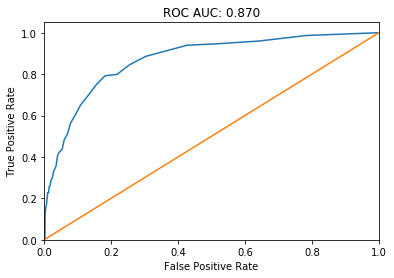

In [83]:
plot_roc_curve(basic_probabilities[:, 1], y_test)

In [84]:
quality_report(basic_prediction, y_test)

Accuracy: 0.952
Precision: 0.047
Recall: 0.467
f1_score: 0.085


### Параметр precision свидетельствует о том, что модель обучилась неправильно. Очевидно, дело - в разбалансе классов.
### Попробуем undersampling...

In [85]:
undersampler = CondensedNearestNeighbour(random_state=42)

In [86]:
X_res, y_res = undersampler.fit_resample(X_train, y_train)

In [87]:
y_train.value_counts()

0    7006
1     346
Name: class, dtype: int64

In [88]:
pd.Series(y_res).value_counts()

0    1279
1     346
dtype: int64

In [89]:
y_test.value_counts()

0    3002
1     149
Name: class, dtype: int64

In [90]:
basic_classifier.fit(X_res, y_res)
basic_prediction = basic_classifier.predict(X_test)
basic_probabilities = basic_classifier.predict_proba(X_test)

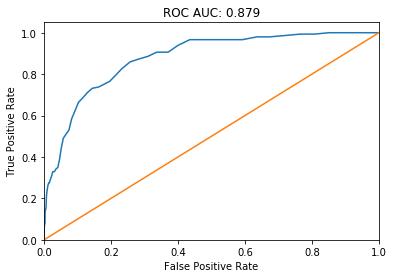

In [91]:
plot_roc_curve(basic_probabilities[:, 1], y_test)

In [92]:
quality_report(basic_prediction, y_test)

Accuracy: 0.955
Precision: 0.174
Recall: 0.578
f1_score: 0.268


### Хотя и удалось значительно повысить precision, результаты предсказания остались неудовлитворительными.
### Попробуем oversampling...

In [93]:
oversampler = SMOTE(random_state=42)

In [94]:
X_res, y_res = oversampler.fit_resample(X_train, y_train)

In [95]:
pd.Series(y_res).value_counts()

1    7006
0    7006
dtype: int64

In [96]:
basic_classifier.fit(X_res, y_res)
basic_prediction = basic_classifier.predict(X_test)
basic_probabilities = basic_classifier.predict_proba(X_test)

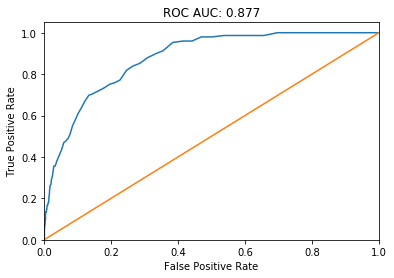

In [97]:
plot_roc_curve(basic_probabilities[:, 1], y_test)

In [98]:
quality_report(basic_prediction, y_test)

Accuracy: 0.948
Precision: 0.235
Recall: 0.417
f1_score: 0.300


### Удалось ещё немного повысить precision, продолжим работать с результатами oversampling'а.

## Подбор параметров Random forest

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
params = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 2, 8, 16], 'max_features':[None, 'log2', 'sqrt']}

In [101]:
grid_estimator = GridSearchCV(estimator=basic_classifier, param_grid=params, cv=5)
grid_estimator = grid_estimator.fit(X_res, y_res)

In [102]:
grid_estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
params = {'n_estimators': [200, 400, 800, 1600]}
optimized_classifier = RandomForestClassifier(n_estimators=100, max_features='log2', max_depth=None)

In [104]:
grid_estimator = GridSearchCV(estimator=optimized_classifier, param_grid=params, cv=5)
grid_estimator = grid_estimator.fit(X_res, y_res)

In [105]:
grid_estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
params = {'n_estimators': [1600, 2400, 3200, 6400]}
optimized_classifier = RandomForestClassifier(n_estimators=1600, max_features='log2', max_depth=None)
grid_estimator = GridSearchCV(estimator=optimized_classifier, param_grid=params, cv=5)
grid_estimator = grid_estimator.fit(X_res, y_res)

In [107]:
grid_estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
optimized_classifier = RandomForestClassifier(n_estimators=200, max_features='log2', max_depth=None)

In [109]:
optimized_classifier.fit(X_res, y_res)
optimized_prediction = optimized_classifier.predict(X_test)
optimized_probabilities = optimized_classifier.predict_proba(X_test)

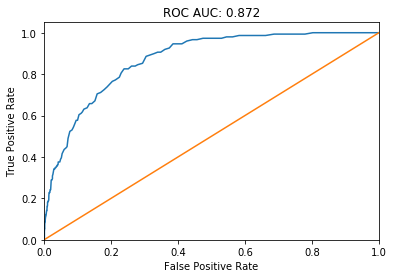

In [110]:
plot_roc_curve(optimized_probabilities[:, 1], y_test)

In [111]:
quality_report(optimized_prediction, y_test)

Accuracy: 0.947
Precision: 0.242
Recall: 0.400
f1_score: 0.301


In [112]:
optimized_classifier = RandomForestClassifier(n_estimators=6400, max_features='log2', max_depth=None)

In [113]:
optimized_classifier.fit(X_res, y_res)
optimized_prediction = optimized_classifier.predict(X_test)
optimized_probabilities = optimized_classifier.predict_proba(X_test)

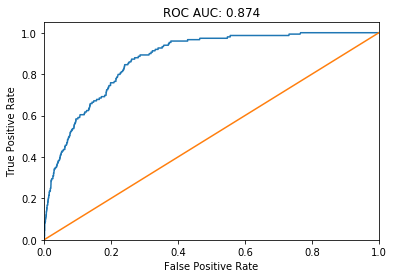

In [114]:
plot_roc_curve(optimized_probabilities[:, 1], y_test)

In [115]:
quality_report(optimized_prediction, y_test)

Accuracy: 0.948
Precision: 0.235
Recall: 0.417
f1_score: 0.300


## <font color=red> Поиск оптимальных параметров показал, что результаты классификатора с параметрами по умолчанию превзойти не удалось.

## <font color=blue> Исследование, использовавшее этот набор данных: https://www.ii.pwr.edu.pl/~tomczak/PDF/[MZSTJT].pdf
## В нём для оценки качества предсказаня использовался параметр ROC AUC. Результаты сравнения разных моделей. Результаты random forest на выбранном наборе данных подсвечены:
<img src="reference_results.png" alt="reference_results" title="Reference results" />

## 4. Extremely Randomized Trees

In [116]:
randomized_classifier = ExtraTreesClassifier(n_estimators=200, max_leaf_nodes=None, n_jobs=-1, random_state=1812)

In [117]:
randomized_classifier.fit(X_res, y_res)
randomized_prediction = randomized_classifier.predict(X_test)
randomized_probabilities = randomized_classifier.predict_proba(X_test)

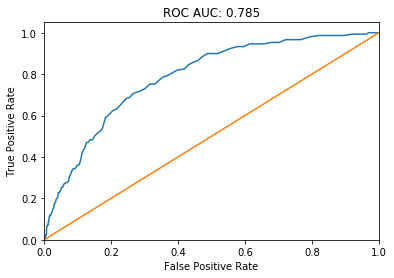

In [118]:
plot_roc_curve(randomized_probabilities[:, 1], y_test)

In [119]:
quality_report(randomized_prediction, y_test)

Accuracy: 0.943
Precision: 0.107
Recall: 0.258
f1_score: 0.152


In [120]:
from sklearn.metrics import confusion_matrix

Text(0.5, 24.0, 'Predicted label')

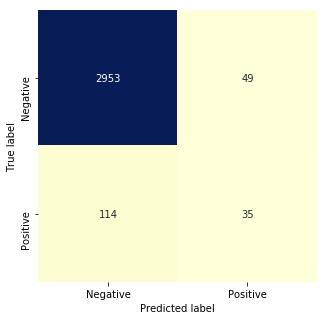

In [121]:
cm = confusion_matrix(y_test, basic_prediction)
conf_matrix = pd.DataFrame(data = cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [122]:
quality_report(basic_prediction, y_test)

Accuracy: 0.948
Precision: 0.235
Recall: 0.417
f1_score: 0.300


## Из всех опробованных моделей лучшие результаты показал Random Forest с параметрами по умолчанию.
## Однако, сами результаты неудовлетворительные. Высокое значение accuracy связано со значительным дисбалансом классов. Значение precision показывает, что верно классифицированы только 25% положительных примеров.